# A Quick Introduction to Data Analysis and Manipulation with Python and pandas

In [88]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-01-22 22:43:10.618366


## What is pandas?

If you're getting into machine learning and data science and you're using Python, you're going to use pandas.

[pandas](https://pandas.pydata.org/) is an open source library which helps you analyse and manipulate data.

<img src="../images/pandas-6-step-ml-framework-tools-highlight.png" alt="a 6 step machine learning framework along will tools you can use for each step" width="700"/>

## Why pandas?

pandas provides a simple to use but very capable set of functions you can use to on your data.

It's integrated with many other data science and machine learning tools which use Python so having an understanding of it will be helpful throughout your journey.

One of the main use cases you'll come across is using pandas to transform your data in a way which makes it usable with machine learning algorithms.

## What does this notebook cover?

Because the pandas library is vast, there's often many ways to do the same thing. This notebook covers some of the most fundamental functions of the library, which are more than enough to get started.

## Where can I get help?

If you get stuck or think of something you'd like to do which this notebook doesn't cover, don't fear!

The recommended steps you take are:
1. **Try it** - Since pandas is very friendly, your first step should be to use what you know and try figure out the answer to your own question (getting it wrong is part of the process). If in doubt, run your code.
2. **Search for it** - If trying it on your own doesn't work, since someone else has probably tried to do something similar, try searching for your problem in the following places (either via a search engine or direct):
    * [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) - the best place for learning pandas, this resource covers all of the pandas functionality.
    * [Stack Overflow](https://stackoverflow.com/) - this is the developers Q&A hub, it's full of questions and answers of different problems across a wide range of software development topics and chances are, there's one related to your problem.
    * [ChatGPT](https://chat.openai.com/) - ChatGPT is very good at explaining code, however, it can make mistakes. Best to verify the code it writes first before using it. Try asking "Can you explain the following code for me? {your code here}" and then continue with follow up questions from there.
    
An example of searching for a pandas function might be:

> "how to fill all the missing values of two columns using pandas"

Searching this on Google leads to this post on Stack Overflow: https://stackoverflow.com/questions/36556256/how-do-i-fill-na-values-in-multiple-columns-in-pandas

The next steps here are to read through the post and see if it relates to your problem. If it does, great, take the code/information you need and **rewrite it** to suit your own problem.

3. **Ask for help** - If you've been through the above 2 steps and you're still stuck, you might want to ask your question on Stack Overflow. Remember to be specific as possible and provide details on what you've tried.

Remember, you don't have to learn all of these functions off by heart to begin with. 

What's most important is remembering to continually ask yourself, "what am I trying to do with the data?".

Start by answering that question and then practicing finding the code which does it.

Let's get started.

## 0. Importing pandas

To get started using pandas, the first step is to import it. 

The most common way (and method you should use) is to import pandas as the abbreviation `pd` (e.g. `pandas` -> `pd`).

If you see the letters `pd` used anywhere in machine learning or data science, it's probably referring to the pandas library.

In [1]:
import pandas as pd

# Print the version
print(f"pandas version: {pd.__version__}")

pandas version: 2.0.3


In [2]:
from faker import Faker
from faker_vehicle import VehicleProvider

fake = Faker()
fake.add_provider(VehicleProvider)

## 1. Datatypes

pandas has two main datatypes, `Series` and `DataFrame`.
* [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) - a 1-dimensional column of data.
* [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) (most common) - a 2-dimesional table of data with rows and columns.

You can create a `Series` using `pd.Series()` and passing it a Python list.

In [92]:
# Creating a series of car types
# cars = pd.Series(["BMW", "Toyota", "Honda"])
# cars

0        BMW
1        Kia
2      Dodge
3    Lincoln
4        Ram
5     Toyota
6    Pontiac
7       Ford
8      Buick
9      Acura
dtype: object

In [ ]:
# Creating a series of colours
# colours = pd.Series(["Blue", "Red", "White"])

In [7]:
car_lst = list(set([fake.vehicle_make() for _ in range(10)]))
cars = pd.Series(car_lst)
color_lst = [fake.safe_color_name() for _ in range(len(car_lst))]
colours = pd.Series(color_lst)

You can create a `DataFrame` by using `pd.DataFrame()` and passing it a Python dictionary.

Let's use our two `Series` as the values.

In [8]:
# Creating a DataFrame of cars and colours
car_data = pd.DataFrame({"Car type": cars,  "Colour": colours})
car_data

,Car type,Colour
0,Kia,purple
1,Volkswagen,green
2,Lexus,fuchsia
3,BMW,maroon
4,Lincoln,white
5,Honda,silver
6,Eagle,olive
7,Chevrolet,purple


You can see the keys of the dictionary became the column headings (text in bold) and the values of the two `Series`'s became the values in the DataFrame.

It's important to note, many different types of data could go into the DataFrame. 

Here we've used only text but you could use floats, integers, dates and more.

### Exercises

1. Make a `Series` of different foods.
2. Make a `Series` of different dollar values (these can be integers).
3. Combine your `Series`'s of foods and dollar values into a `DataFrame`.

Try it out for yourself first, then see how your code goes against the solution.

**Note:** Make sure your two `Series` are the same size before combining them in a DataFrame.

In [9]:
# Your code here
from faker_food import FoodProvider
fake.add_provider(FoodProvider)

fruits = pd.Series([fake.fruit() for _ in range(10)])
prices = pd.Series([fake.pyfloat(left_digits=2, right_digits=2, positive=True) for _ in range(10)])
food_data = pd.DataFrame({"Fruit": fruits,  "Price": prices})
food_data

,Fruit,Price
0,Tangelo,70.72
1,Aubergine,77.99
2,Custard Apples,6.34
3,Cantaloupe,9.31
4,Avocado,34.91
5,Incaberries,72.94
6,Dates,7.76
7,Papaya,61.22
8,Oranges,21.48
9,Honeydew melon,69.82


In [97]:
# Example solution

# Make a Series of different foods
foods = pd.Series(["Almond butter", "Eggs", "Avocado"])

# Make a Series of different dollar values 
prices = pd.Series([9, 6, 2])

# Combine your Series of foods and dollar values into a DataFrame
food_data = pd.DataFrame({"Foods": foods,
                          "Price": prices})

food_data

,Foods,Price
0,Almond butter,9
1,Eggs,6
2,Avocado,2


## 2. Importing data

Creating `Series` and `DataFrame`'s from scratch is nice but what you'll usually be doing is importing your data in the form of a `.csv` (comma separated value), spreadsheet file or something similar such as an [SQL database](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html).

pandas allows for easy importing of data like this through functions such as [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) (for Microsoft Excel files).

Say you wanted to get this information from this Google Sheet document into a pandas `DataFrame`. 

<img src="../images/pandas-car-sales-csv.png" alt="spreadsheet with car sales information" width="600">

You could export it as a `.csv` file and then import it using `pd.read_csv()`. 

> **Tip:** If the Google Sheet is public, `pd.read_csv()` can read it via URL, try searching for "pandas read Google Sheet with URL".

In this case, the exported `.csv` file is called `car-sales.csv`.

In [98]:
# create a dataframe named car-sales-faker with 100 rows and 5 columns columns are: Make, Colour, Odometer (KM), Doors, Price ($) use faker to populate the data save the data to a csv file

# number = 5000
# maker = [fake.vehicle_make() for _ in range(number)]
# color = [fake.safe_color_name() for _ in range(number)]
# odometer = [fake.pyint(min_value=1000, max_value=100000) for _ in range(number)]
# doors = [fake.pyint(min_value=2, max_value=7) for _ in range(number)]

# # prices count by thounsands and have $ before the number, price have comma
# prices = [fake.pyint(min_value=1000, max_value=100000) for _ in range(number)]
# prices = ["$" + str(price) for price in prices]
# prices = [price[:-3] + "," + price[-3:] for price in prices]

# car_sales_faker = pd.DataFrame({"Make": maker, 
#                                 "Colour": color, 
#                                 "Odometer (KM)": odometer, 
#                                 "Doors": doors, 
#                                 "Price": prices})
# car_sales_faker.to_csv("../data/car-sales-faker.csv", index=False)

In [10]:
# Import car sales data
# car_sales = pd.read_csv("../data/car-sales.csv") # takes a filename as string as input
# car_sales

car_sales = pd.read_csv("../data/car-sales-faker.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"


Now we've got the same data from the spreadsheet available in a pandas `DataFrame` called `car_sales`. 

Having your data available in a `DataFrame` allows you to take advantage of all of pandas functionality on it.

Another common practice you'll see is data being imported to `DataFrame` called `df` (short for `DataFrame`).

In [11]:
# Import the car sales data and save it to df
# df = pd.read_csv("../data/car-sales.csv")
df = pd.read_csv("../data/car-sales-faker.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"
...,...,...,...,...,...
4995,GMC,gray,66301,4,"$96,958"
4996,Chrysler,fuchsia,15145,5,"$77,949"
4997,Cadillac,teal,54776,6,"$15,387"
4998,Lexus,aqua,72956,4,"$88,575"


Now `car_sales` and `df` contain the exact same information, the only difference is the name. Like any other variable, you can name your `DataFrame`'s whatever you want. But best to choose something simple.

### Anatomy of a DataFrame

Different functions use different labels for different things. This graphic sums up some of the main components of `DataFrame`'s and their different names.

<img src="../images/pandas-dataframe-anatomy.png" alt="pandas dataframe with different sections labelled" width="800"/>


## 3. Exporting data

After you've made a few changes to your data, you might want to export it and save it so someone else can access the changes.

pandas allows you to export `DataFrame`'s to `.csv` format using [`.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) or spreadsheet format using [`.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html).

We haven't made any changes yet to the `car_sales` `DataFrame` but let's try export it.

In [101]:
# # Export the car sales DataFrame to csv
# car_sales.to_csv("../data/exported-car-sales.csv")

Running this will save a file called `export-car-sales.csv` to the current folder.

<img src="../images/pandas-exported-car-sales-csv.png" alt="folder with exported car sales csv file highlighted" width="600"/>

## Exercises

1. Practice importing a `.csv` file using `pd.read_csv()`, you can download `heart-disease.csv`. This file contains annonymous patient medical records and whether or not they have heart disease.
2. Practice exporting a `DataFrame` using `.to_csv()`. You could export the heart disease `DataFrame` after you've imported it.

**Note:** 
* Make sure the `heart-disease.csv` file is in the same folder as your notebook orbe sure to use the filepath where the file is.
* You can name the variables and exported files whatever you like but make sure they're readable.

In [102]:
# Your code here

# heart_disease = pd.read_csv("../data/heart-disease.csv")
# heart_disease = heart_disease.sample(frac=1)
# heart_disease.to_csv("../data/heart-disease-shuffled.csv", index=False)

heart_disease = pd.read_csv("../data/heart-disease-shuffled.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
1,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
2,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
3,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
4,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
299,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
300,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
301,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


### Example solution

In [103]:
# Importing heart-disease.csv
patient_data = pd.read_csv("../data/heart-disease.csv")
patient_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [104]:
# Exporting the patient_data DataFrame to csv
patient_data.to_csv("../data/exported-patient-data.csv")

<img src="../images/pandas-exported-patient-data-csv.png" alt="folder containing exported patient data csv file" width="600"/>

## 4. Describing data

One of the first things you'll want to do after you import some data into a pandas `DataFrame` is to start exploring it.

pandas has many built in functions which allow you to quickly get information about a `DataFrame`.

Let's explore some using the `car_sales` `DataFrame`.

In [12]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"
...,...,...,...,...,...
4995,GMC,gray,66301,4,"$96,958"
4996,Chrysler,fuchsia,15145,5,"$77,949"
4997,Cadillac,teal,54776,6,"$15,387"
4998,Lexus,aqua,72956,4,"$88,575"


[`.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) shows us what datatype each column contains.

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

Notice how the `Price` column isn't an integer like `Odometer` or `Doors`. Don't worry, pandas makes this easy to fix.

[`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) gives you a quick statistical overview of the numerical columns.

In [14]:
car_sales.describe()    # only works on numeric columns

,Odometer (KM),Doors
count,5000.000000,5000.000000
mean,50520.263000,4.449000
std,28149.797963,1.719532
min,1033.000000,2.000000
25%,26369.500000,3.000000
50%,49964.000000,4.000000
75%,74545.250000,6.000000
max,99996.000000,7.000000


[`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) shows a handful of useful information about a `DataFrame` such as: 
* How many entries (rows) there are 
* Whether there are missing values (if a columns non-null value is less than the number of entries, it has missing values)
* The datatypes of each column

In [15]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           5000 non-null   object
 1   Colour         5000 non-null   object
 2   Odometer (KM)  5000 non-null   int64 
 3   Doors          5000 non-null   int64 
 4   Price          5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


You can also call various statistical and mathematical methods such as [`.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) or [`.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) directly on a `DataFrame` or `Series`.

In [17]:
# car_sales.mean()

TypeError: Could not convert ['RamChevroletINFINITIChevroletNissanRamDodgeOldsmobileGMCHondaGMCFordToyotaJeepChevroletDodgePontiacChevroletChevroletVolvoBMWFordChevroletJaguarMitsubishiPorscheChevroletLotusAcuraSubaruChevroletChevroletHondaGeoNissanDodgeChevroletJaguarPlymouthLincolnMAZDAFordChevroletVolkswagenBuickKiaJeepSubaruChevroletVolvoMercedes-BenzMercedes-BenzChevroletBMWMAZDAToyotaHyundaiChevroletFordVolkswagenSaturnFordNissanAcuraMercedes-BenzAudiINFINITIMaseratiDodgeChevroletToyotaToyotaFordDodgeNissanFordFordChevroletSubaruHondaFreightlinerJaguarCadillacGMCJaguarLexusMercedes-BenzDodgeChevroletVolvoToyotaPontiacMercedes-BenzFerrariPlymouthRamGMCChryslerFordVolvoDodgeFIATIsuzuFordNissanToyotaFordFordBentleyFerrariFerrariPorscheMcLarenSuzukiBMWVolkswagenToyotaBuickMINIGMCMercedes-BenzINFINITIGMCNissanMitsubishiPorscheBuickChevroletVolvoMINIAcuraToyotaDodgeMAZDAGMCChevroletBMWMAZDAVolkswagenHyundaiAston MartinVolkswagenHyundaiOldsmobileHondaMercedes-BenzDodgeMAZDAINFINITILincolnFordMercedes-BenzFordMitsubishiScionGMCKiaFordNissanMercedes-BenzSaturnMaybachFordMINIVolkswagenDodgeNissanChevroletSubaruSaabSuzukiBMWSubaruHondaDodgeAudiToyotaChevroletAcuraVolkswagenBMWBuickToyotaFordMercedes-BenzFordGMCHondaAcuraToyotaMINIVolkswagenChevroletFordDodgeVolkswagenFordChevroletVolvoMercedes-BenzMAZDAHyundaiINFINITIToyotaVolkswagenMercuryVolkswagenMAZDAGMCGMCPorscheDaewooJeepCadillacMercedes-BenzLexusKiaPontiacGMCMercedes-BenzMAZDAToyotaLotusVolkswagenMercedes-BenzVolvoChryslerHyundaiDodgeINFINITIMcLarenToyotaBMWOldsmobileIsuzuFordGMCChevroletDodgeToyotaHondaRamGMCDodgeAudiChevroletNissanChryslerJeepBMWToyotaBuickKiaChryslerMINIFordDodgeGMCSuzukiNissanSubaruBMWChevroletMAZDAChevroletDodgeGMCMercedes-BenzMitsubishiMINIHondaDodgeFordCadillacNissanMaybachFordChevroletGMCDodgeMercedes-BenzToyotaChevroletCadillacChevroletMercedes-BenzMitsubishiGMCVolkswagenAudiGMCHyundaiChevroletChevroletFordChevroletINFINITIMcLarenChevroletAudiJeepLexusJaguarAston MartinDodgeChevroletGMCKiaSubaruDaewooVolkswagenChevroletHyundaiBuickINFINITIMitsubishiMitsubishiFordDodgeToyotaPontiacGMCBuickBMWCadillacGMCDodgeToyotaDodgeOldsmobileFreightlinerChevroletVolvoAcuraToyotaDodgeKiaGMCFordChryslerAston MartinToyotaMcLarenSuzukiBMWFordSuzukiChevroletGMCBuickVolvoPorscheFordMAZDAMAZDANissanNissanAudiNissanLincolnGMCIsuzuNissanFordGMCFerrariGMCFordFordVolvoDodgePontiacToyotaChevroletMercuryGMCBMWMercedes-BenzPlymouthToyotaMercedes-BenzGMCSuzukiLexusMercedes-BenzGMCVolkswagenVolkswagenGMCLexusMercedes-BenzAcuraBuickPorscheMercedes-BenzHondaLexusToyotaToyotaCadillacChryslerBuickBentleyAudiMINIBentleyDodgeFordNissanChevroletDodgeHondaAudiFerrariOldsmobileVolvoVolkswagenGMCScionFordToyotaPorscheMINIToyotaBMWMercedes-BenzMaseratiINFINITIMaseratiBMWGMCJaguarNissanRamLincolnToyotaDodgeNissanMercedes-BenzPorscheGMCMINIGMCChevroletBMWAudiHyundaiNissanCadillacFordChevroletNissanChevroletMINIGMCGMCChevroletToyotaRamFordToyotaGMCGMCNissanLand RoverFordMercedes-BenzHondaFordLexusPontiacNissanGMCGMCVolvoFordNissanAcuraToyotaGeoDodgeChevroletMercedes-BenzDodgeChryslerFerrariChevroletMAZDAHondaLincolnSubaruToyotaIsuzuKiaChevroletFordLexusGMCChevroletChryslerKiaOldsmobileFordMitsubishiChevroletScionSubaruAston MartinLincolnMAZDACadillacBMWHyundaiMercedes-BenzMercedes-BenzMitsubishiSaabChryslerAudiChevroletSubaruLand RoverAcuraLexusSuzukiGMCMercedes-BenzSubaruSubaruOldsmobileLand RoverMercedes-BenzToyotaBMWToyotaMAZDANissanGMCLexusToyotaToyotaFordToyotaChevroletGMCCadillacDodgeRamDodgeLexusLincolnSuzukiChryslerDodgeMercedes-BenzBuickHyundaiJaguarChevroletChevroletToyotaAudiLand RoverMitsubishiHondaCadillacKiaMercedes-BenzMAZDAHondaNissanNissanMercedes-BenzHyundaiPontiacVolkswagenGMCFordFordLincolnMercedes-BenzMercedes-BenzLexusMercedes-BenzNissanSaabAudiKiaAudiToyotaChevroletJeepKiaKiaMercedes-BenzChevroletChevroletKiaINFINITIPlymouthHondaDodgeFordMercedes-BenzNissanMAZDAChevroletFordLexusVolkswagenMAZDARolls-RoyceNissanKiaSaturnToyotaHondaBentleyMINISaturnToyotaBMWMAZDAVolvoINFINITIChevroletMitsubishiChevroletChevroletFerrariKiaNissanLand RoverGMCNissanHondaPontiacChevroletSubaruVolkswagenLexusMercedes-BenzMercuryChevroletNissanFerrariLexusSubaruGMCCadillacPorscheBMWAcuraChevroletINFINITIEagleMitsubishiSubaruChevroletSubaruToyotaHUMMERHyundaiChevroletChevroletMercuryHyundaiFordBMWCadillacVolkswagenFordAudiHyundaiHondaHondaPorscheChevroletVolvoAudiVolvoVolvoLamborghiniSuzukiLincolnBMWToyotaINFINITIToyotaFordLexusHyundaiHUMMERMercedes-BenzLexusFordGMCPlymouthFordLexusMAZDABMWToyotaToyotaRamCadillacChevroletFordGMCGMCGMCVolvoRamGMCBMWAudiGMCLincolnVolvoMercuryKiaMAZDAAudiToyotaAudiNissanRamHyundaiINFINITINissanLexusGMCAudiToyotaFordChryslerDodgeNissanChevroletFordToyotaNissanDodgeVolvoMercedes-BenzOldsmobileMINIGMCCadillacGMCFordIsuzuMercedes-BenzHondaSubaruFordHyundaiHondaChevroletNissanVolvoDodgeScionCadillacChevroletVolkswagenFordVolkswagenMercedes-BenzFordPorscheChevroletINFINITIBuickOldsmobileDodgeAudiFordDodgeMercedes-BenzNissanFerrariPontiacMercedes-BenzHondaGMCLincolnBMWMAZDABMWDodgeMercedes-BenzNissanChevroletFIATVolkswagenVolvoToyotaChevroletHondaBMWJeepBuickRamChryslerLand RoverMercedes-BenzFordAudiMercuryINFINITIMitsubishiMINIGMCFordDodgeLexusVolkswagenFordVolvoMitsubishiMercedes-BenzHondaScionIsuzuChevroletAudiAudiMAZDAAudiChevroletKiaMitsubishiChevroletFordPontiacSubaruToyotaBMWToyotaMitsubishiToyotaChevroletGMCFIATFordMAZDAKiaIsuzuMercuryPontiacDodgeToyotaToyotaToyotaAudiFordGMCLotusJeepMercedes-BenzMercedes-BenzDodgeMercedes-BenzOldsmobileHyundaiToyotaToyotaFordChevroletINFINITIFordNissanDodgeJaguarChevroletToyotaNissanAudiChevroletGMCKiaDodgeHondaSubaruKiaChevroletFordFordGMCMitsubishiToyotaKiaHyundaiGMCToyotaChevroletChevroletFordMitsubishiNissanSubaruGMCLexusToyotaMAZDASuzukiToyotaChryslerDodgeFordAcuraDodgeMaybachBMWBuickLincolnBMWJeepMitsubishiMercuryLincolnLand RoverBMWFordSubaruINFINITIMaseratiFordSaturnMercuryMercedes-BenzMercedes-BenzChevroletGMCGMCFordMercedes-BenzChevroletJaguarToyotaFordHyundaiLotusFordKiaBMWMercedes-BenzGMCINFINITIBMWLotusBuickSubaruVolvoFordJeepNissanNissanMaseratiChevroletChevroletMercedes-BenzAudiSaabChevroletAudiKiaLincolnFerrariFordFordMAZDAToyotaNissanGMCMINIToyotaHyundaiChryslerIsuzuFordBMWVolkswagenNissanToyotaFordGMCRamMercuryINFINITIMercuryMaybachMercedes-BenzNissanChevroletLexusLexusDodgeMitsubishiSuzukiGMCKiaSuzukiChevroletLexusDodgeSuzukiPorscheFordKiaGMCFordMINIChevroletGMCNissanSuzukiNissanDodgeVolvoMAZDAGMCMercedes-BenzFordsmartDodgeSaturnBMWBentleyFreightlinerChevroletGMCMercedes-BenzHyundaiMaseratiLincolnVolvoNissanMercedes-BenzFerrariFordKiaFIATLand RoverHondaRamToyotaMercedes-BenzOldsmobileBMWVolkswagenBMWMAZDALexusSuzukiVolkswagenChevroletVolvoAudiLexusChevroletMercedes-BenzGMCChevroletChevroletDodgeSaabFordChevroletDodgeToyotaFordToyotaNissanJaguarSuzukiMitsubishiVolvoBentleyRamChevroletAudiSuzukiVolvoChryslerFordGMCFreightlinerChevroletFordLand RoverBMWToyotaLamborghiniCadillacAudiVolkswagenAudiPorscheFordGMCRamChevroletDodgeJeepMitsubishiNissanToyotaToyotaVolvoPontiacToyotaGMCVolkswagenMercedes-BenzLincolnChevroletToyotaFordVolkswagenNissanAston MartinToyotaSubaruChevroletNissanChevroletFordFordGMCMaybachPontiacFordAudiGMCFordNissanRamINFINITISubaruMINIAcuraDodgeFIATHondaBMWChevroletDodgeAudiChevroletINFINITINissanHondaKiaMitsubishiLand RoverJaguarGMCAcuraAudiMAZDALincolnGMCVolkswagenDodgeChryslerGMCAcuraGMCChevroletAudiNissanHondaMaseratiLexusChevroletAudiChevroletFordAcuraINFINITIHondaMaseratiBMWFordDodgeRamFordFordChevroletJeepChevroletsmartBuickSuzukiMaseratiDodgeSaturnToyotaMercedes-BenzToyotaNissanPontiacChevroletVolvoToyotaMercedes-BenzFordHondaSubaruGMCVolkswagenMercedes-BenzFordBuickGMCMercedes-BenzPlymouthChevroletMAZDAChryslerVolvoGMCVolvoPontiacFordFordMercedes-BenzToyotaChevroletVolvoAcuraRamMINIPontiacChevroletMercedes-BenzNissanGeoHyundaiHyundaiTeslaFordFordFordChryslerBentleyDodgeChevroletFordToyotaMitsubishiAcuraBMWDodgeINFINITINissanToyotaChevroletToyotaToyotaHyundaiHondaAudiMercuryNissanFordMAZDAAudiINFINITIMercurySubaruHyundaiOldsmobileNissanGMCAudiFordChevroletToyotaPorscheFordJeepMercuryMINIMAZDAGMCHyundaiKiaBuickToyotaPontiacKiaFordVolvoNissanMercedes-BenzVolkswagenFordMAZDAChevroletCadillacChevroletAudiToyotaAcuraToyotaChevroletBMWScionFordGMCBMWPontiacNissanMercedes-BenzPlymouthGMCLincolnGMCAston MartinFordAudiVolkswagenNissanFordAcuraJeepVolkswagenVolkswagenScionSuzukiChevroletINFINITIAcuraNissanFordHyundaiHondaAudiMercedes-BenzDodgeScionAudiFordSaturnChevroletLexussmartHondaToyotaDodgeBMWChevroletToyotaToyotaGMCMercedes-BenzGMCGenesisAudiLexusChevroletMitsubishiMitsubishiFordDodgeFordJeepLexusRamMitsubishiFreightlinerChevroletGMCToyotaChevroletHondaDodgeJeepDodgeKiaGMCFordChevroletLand RoverVolkswagenHyundaiMAZDAChryslerCadillacPontiacPontiacAudiMitsubishiBMWNissanFIATIsuzuFordHondaLexusNissanGMCChevroletToyotaBMWChevroletVolvoKiaChevroletBuickNissanPorscheAudiToyotaPlymouthSRTMercedes-BenzKiaToyotaKiaAston MartinCadillacDodgeChevroletINFINITIChevroletFordFordChevroletHyundaiBMWSubaruGMCChevroletChevroletDodgeRamHyundaiChevroletChevroletLand RoverToyotaCadillacAcuraSubaruChevroletAudiSuzukiSubaruNissanDodgeChevroletToyotaAudiMAZDARamSaabFordGMCChevroletFordBuickBMWVolvoDodgeChevroletGMCFordBMWGMCFordChevroletChryslerDodgeJeepFordDodgeBMWNissanFordDodgeCadillacAudiGMCKiaGMCHyundaiDodgeSubaruFordOldsmobileOldsmobileNissanIsuzuSaabTeslaVolvoJeepToyotaFordVolvoCadillacLexusLand RoverGMCPanozDodgeSuzukiSubaruVolkswagenMercedes-BenzMercuryHondaVolkswagenMercedes-BenzIsuzuLand RoverSRTBMWChryslerChevroletPlymouthAcuraNissanChryslerLincolnVolkswagenJaguarGMCDodgeMercedes-BenzAcuraVolvoAudiCadillacFordLamborghiniGenesisMaseratiAudiChevroletMINIAudiCadillacDodgeVolvoChevroletToyotaPontiacOldsmobileLexusJeepPontiacToyotaNissanDodgeMitsubishiToyotaMercedes-BenzToyotaBuickDodgeBuickMitsubishiTeslaAcuraAudiKiaMAZDAFordSaabHondaMaseratiChevroletMaseratiVolkswagenSaturnChevroletVolkswagenFordSuzukiFordNissanChevroletCadillacBMWToyotaSubaruBMWHyundaiGMCMINIHUMMERMINIVolvoSuzukiLincolnNissanBMWGMCLand RoverKiaToyotaDodgeChevroletFordOldsmobileToyotaDodgeNissanToyotaFordAudiChevroletVolvoPorscheToyotaNissanAcuraDodgeDodgeNissanBMWNissanGMCChevroletRamChevroletMercedes-BenzKiaDodgeNissanAcuraHondaFordMercedes-BenzMercedes-BenzPorscheSaturnHUMMERMercedes-BenzHyundaiAudiRamPlymouthMercedes-BenzDodgeKiaLincolnAudiChevroletDaewooAudiVolkswagenChevroletLand RoverJaguarToyotaCadillacJeepChevroletNissanToyotaFordLexusChevroletBMWChevroletIsuzuDodgeChevroletGMCVolkswagenAudiKiaBMWMercedes-BenzChryslerNissanFordGMCChevroletKiaVolvoFordMaybachChevroletKiaFordBMWFordChevroletHondaKiaBMWFordMAZDADodgeDodgeFreightlinerChevroletBuickJaguarSuzukiToyotaVolkswagenHyundaiMAZDAOldsmobileGMCNissanFordKiaDodgeAcuraAudiChevroletLexusLexusHyundaiBuickPlymouthVolvoFordCadillacChryslerKiaLand RoverMitsubishiDodgeChevroletChevroletFerrariToyotaChevroletKiaIsuzuMAZDAGMCAudiDodgeGMCChevroletChevroletSRTDodgeToyotaAudiMitsubishiMAZDAChevroletGenesisChevroletAcuraINFINITIMercedes-BenzKiaMercedes-BenzGMCNissanSuzukiFerrariFordJeepDodgeNissanGMCJaguarMitsubishiMaseratiPorscheToyotaFordFordIsuzuSuzukiNissanFordBMWScionLand RoverMAZDAMitsubishiJaguarIsuzuDodgeGMCVolkswagenChevroletGMCLincolnMaseratiBMWIsuzuAudiRamRamNissanGMCLand RoverIsuzuVolvoLand RoverFordSaabAudiEaglePontiacSaabFordFordBuickChevroletChevroletFordSuzukiToyotaPorschePanozINFINITIVolkswagenFordPorscheChevroletChevroletRamGMCLexusMitsubishiVolvoGMCChevroletMitsubishiFordToyotaFordNissanDodgeMercedes-BenzSuzukiLamborghiniMAZDAChevroletLexusGMCMercedes-BenzChryslerFordGMCToyotaPorscheVolkswagenBMWBuickMINIBMWRamKiaSubaruBMWToyotaVolvoRamVolkswagenToyotaRamToyotaVolkswagenToyotaPontiacFordNissanHyundaiMercedes-BenzNissanHyundaiFordJeepToyotaLexusLand RoverVolvoToyotaChevroletChevroletGMCMaseratiGeoFordHondaDodgeAudiAston MartinHondaVolkswagenHyundaiFordVolvoGMCChryslerLincolnMitsubishiFordChevroletFordChevroletChryslerDodgeChevroletDodgeBMWChevroletGMCHyundaiFordFerrariFreightlinerOldsmobileChevroletDodgeJaguarToyotaSubaruAcuraChevroletVolkswagenGMCBMWDodgeMINIHUMMERMercedes-BenzGMCSuzukiFordFordPlymouthHyundaiHondaHyundaiPorscheMAZDALincolnNissanChevroletHyundaiFordFordAcuraMAZDAGMCToyotaKiaAston MartinAcuraVolkswagenMercedes-BenzRamFordVolkswagenFordDodgeGMCChevroletChevroletGMCChevroletToyotaFreightlinerMercedes-BenzsmartBuickToyotaChevroletBMWGMCChevroletChevroletAudiFordBMWBMWChevroletFerrariSubaruGMCGMCToyotaMAZDABuickChevroletToyotaLand RoverFordChevroletAudiMercedes-BenzNissanChevroletFordFordDodgeFordAcuraMitsubishiMAZDANissanIsuzuFordFordBMWFordBuickGMCDodgeAudiLand RoverCadillacHondaGMCToyotaJeepFordKiaChevroletAudiHyundaiFerrariCadillacDodgeBuickGMCChevroletMercedes-BenzKiaHyundaiFordHondaMitsubishiHondaChevroletBMWMINIToyotaFordNissanVolvoToyotaNissanHyundaiSuzukiPorscheAudiVolvoChevroletDodgeFreightlinerBuickToyotaFordChevroletFordChevroletFordSaturnVolkswagenNissanLincolnPorscheChryslerJeepGenesisDodgeOldsmobileChevroletNissanDodgeToyotaOldsmobileVolkswagenGMCLincolnVolvoBMWHyundaiBMWVolkswagenMercedes-BenzFreightlinerToyotaLincolnBMWBMWMercedes-BenzChevroletMercuryFordVolkswagenPontiacMercedes-BenzGMCNissanMINIMercuryDodgeVolkswagenDodgeMAZDAMercedes-BenzToyotaFordChevroletToyotaFordChevroletToyotaMitsubishiAudiFordSubaruChevroletChevroletLexusMINIKiaVolvoToyotaMercedes-BenzHyundaiNissanMINIDodgeFordGMCChevroletToyotaMercuryINFINITIChevroletFerrariLincolnVolvoFerrariDodgeMercedes-BenzHyundaiFordLexusFordScionMAZDARolls-RoyceScionToyotaVolvoDodgeMercedes-BenzMercedes-BenzAston MartinAudiRamPorscheChevroletNissanPorscheGMCFordFordKiaMAZDAToyotaToyotaChryslerNissanMercedes-BenzChevroletINFINITIMercuryJaguarAudiNissanOldsmobileSuzukiKiaGMCVolvoChevroletDodgeToyotaToyotaVolvoLotusPorscheJaguarDodgeJeepMercedes-BenzGMCMINIMaseratiVolkswagenFordFordChevroletINFINITIBuickDodgePorscheDodgeChryslerBMWHyundaiFordBuickNissanChevroletSubaruChevroletDodgeMaseratiAcuraLexusLand RoverGMCKiaSaabChevroletRamToyotaNissanVolkswagenLand RoverDodgeMcLarenGMCChryslerGMCDodgeGMCKiaToyotaBuickChevroletChevroletBMWIsuzuFordGMCMercedes-BenzFordBMWPlymouthGMCLand RoverJaguarBuickTeslaGMCMAZDAAlfa RomeoMitsubishiChevroletBMWFordLincolnJeepChevroletToyotaSubaruLand RoverPontiacSaabBMWEagleEagleKiaMAZDACadillacCadillacLexusDodgeToyotaLincolnHondaFordLincolnGMCVolkswagenMercedes-BenzLand RoverHondaNissanGMCFordFordHyundaiFordFordMAZDAFerrariToyotaChevroletNissanFordAudiTeslaSaabMercedes-BenzChevroletMercedes-BenzChevroletChevroletDodgeNissanDodgeBMWToyotaLotusNissanCadillacFordToyotaChevroletMINIMercedes-BenzMercuryMAZDAChevroletHondaRamVolkswagenChryslerGMCMAZDAFordDodgeGMCHondaPlymouthAudiLexusINFINITIBMWKiaCadillacHondaVolkswagenToyotaGMCNissanLincolnToyotaDodgeGMCINFINITIHyundaiRamChevroletFordBMWMININissanNissanDodgeBMWHyundaiMercedes-BenzDodgeINFINITIGMCMercedes-BenzSubaruNissanToyotaSubaruPontiacNissanAudiGMCChryslerINFINITIGMCChevroletChevroletNissanSubaruChevroletINFINITIFordKiaGMCChryslerToyotaLand RoverBMWHondaMitsubishiNissanIsuzuMercuryMercedes-BenzDodgeHondaToyotaFordEagleFordBMWGMCAcuraAudiChryslerLincolnMercedes-BenzNissanChevroletChevroletVolkswagenPorscheFordFerrariNissanChevroletLexusBMWMaseratiBuickBMWLexusFordBMWMitsubishiRolls-RoyceFordSuzukiLincolnVolkswagenVolkswagenToyotaBMWChevroletBuickNissanSaabFordHondaJeepMitsubishiBuickNissanGenesisKiaChevroletNissanGMCFordMitsubishiHondaMercuryHyundaiPlymouthBMWPontiacSuzukiMercedes-BenzJaguarChevroletSuzukiLexusGMCVolkswagenDodgeNissanMercedes-BenzHyundaiHondaIsuzuAcuraFordPlymouthFordKiaHyundaiFordDodgeMAZDAChevroletMAZDAChevroletBMWVolvoCadillacHondaNissanAudiChevroletMAZDAHondaLincolnMercedes-BenzKiaFordGMCDodgeHUMMERSubaruMAZDAChevroletLexusLexusGMCGMCFordVolkswagenSuzukiRamVolvoToyotaMAZDAChevroletJeepLexusJeepBuickChevroletFordGMCMercedes-BenzNissanFordBuickAston MartinSaabFerrariAudiLexusVolvoGMCGMCChevroletBuickGMCVolvoMercuryCadillacDodgeAudiAudiVolvoPorscheFordIsuzuFordDodgeChevroletChevroletGMCChevroletHyundaiChevroletLand RoverChevroletGMCMAZDAHondaNissanLexusCadillacGMCChevroletFordChevroletKiaAudiRamGMCVolkswagenDodgeChevroletChevroletHUMMERFordFIATChevroletPorscheFordIsuzuMAZDAOldsmobileMercuryBuickGMCAudiHondaJeepFordKiaBMWAudiCadillacDodgeDodgeGMCChevroletCadillacCadillacVolkswagenGMCBMWMercedes-BenzToyotaToyotaDodgeJaguarFordGMCChevroletHyundaiAudiLotusFordChevroletMercedes-BenzFordMAZDAChevroletToyotaLexusMINIAudiChevroletLexusVolvoCadillacBMWGMCJeepDodgeBuickLincolnGMCChryslerSubaruToyotaAudiBMWSubaruFordToyotaHyundaiDodgeHyundaiCadillacAston MartinRamAcuraVolkswagenAston MartinAudiDodgeAcuraDodgeDodgeHondaChevroletAcuraChryslerBuickChevroletAudiDodgeOldsmobileSubaruDodgeDodgeBMWGMCChevroletMitsubishiJaguarPontiacDodgeToyotaAcuraMercedes-BenzMitsubishiNissanVolkswagenGMCKiaToyotaHyundaiRamLand RoverDodgeIsuzuDodgeMitsubishiGMCVolkswagenFordFordMercedes-BenzLincolnGMCAlfa RomeoDodgeHondaSuzukiGMCChevroletLincolnMAZDAGMCAcuraVolvoFordChevroletLamborghiniLexusRamDodgeRolls-RoyceSubaruLamborghiniFordToyotaFordHyundaiChevroletGMCOldsmobileGMCChevroletBMWVolkswagenToyotaAston MartinToyotaDodgeVolkswagenLincolnToyotaGMCLexusDodgeToyotaDodgeMercedes-BenzGMCChevroletSaabNissanNissanChevroletAudiToyotaHondaGMCFordMercedes-BenzBuickChevroletChevroletLexusGMCFordGMCToyotaGMCToyotaFordGMCGMCChevroletCadillacHondaVolkswagenFIATFordVolvoToyotaGMCRamNissanLexusChryslerMitsubishiPontiacLand RoverChevroletPontiacFordGMCJaguarChevroletSubaruVolvoDodgeHondaChevroletBuickRamChevroletFordGMCFordToyotaAudiChryslerCadillacAcuraToyotaAudiAudiMINIFordToyotaMercedes-BenzAudiVolkswagenRamMAZDAAcuraGMCKiaMercedes-BenzChevroletNissanChevroletJaguarLand RoverChevroletBMWPorscheAcuraBMWMercedes-BenzKiaGMCFordJeepLexusBMWSaabVolvoBMWFordKiaAston MartinChevroletHondaChryslerToyotaMAZDAChevroletFordMercedes-BenzHondaFordHyundaiLand RoverJeepVolkswagenFordNissanRamBMWINFINITIVolvoNissanHyundaiChevroletChevroletMAZDALincolnLincolnFordPlymouthVolkswagenSaabFordFordIsuzuChevroletMAZDAHondaChryslerNissanToyotaHyundaiDodgeAudiAcuraFordLincolnAudiFordJeepPorscheChevroletGMCFordFordToyotaVolkswagenNissanToyotaVolvoFIATBMWBMWHyundaiSaabHyundaiChevroletNissanOldsmobileSuzukiDodgeINFINITIChevroletChevroletGMCDodgeToyotaLand RoverDodgeBMWChevroletMercedes-BenzMAZDAChevroletCadillacMercedes-BenzJeepMercedes-BenzSaturnDodgeFordDodgeMitsubishiMercedes-BenzVolkswagenFordDodgeJaguarChevroletAston MartinLexusFordVolkswagenLexusBMWPontiacToyotaBuickINFINITIMitsubishiMAZDAMaseratiDodgeGMCVolvoChevroletMAZDAMaseratiNissanMitsubishiMercedes-BenzGMCHyundaiToyotaMaybachGMCChevroletMercuryVolkswagenAcuraMAZDAGMCMAZDAAudiNissanLincolnMAZDAChevroletNissanCadillacJeepBuickHondaJaguarFordMercedes-BenzOldsmobileLexusMercedes-BenzNissanPorscheNissanMaybachHondaKiaDodgeFerrariAudiFordFordGMCLexusDodgeFordToyotaPontiacPontiacFordVolkswagenFordFordToyotaChevroletINFINITILexusMitsubishiKiaBuickAudiHyundaiPorscheHyundaiINFINITIDodgeFordBuickLexusCadillacSaturnFordHyundaiDodgeLincolnHondaMAZDAAudiMercedes-BenzFordFordCadillacDodgeGMCMcLarenKiaCadillacToyotaIsuzuChevroletFordFordChevroletAudiINFINITIGMCOldsmobileMAZDALexusCadillacDodgeGMCINFINITIBMWIsuzuPontiacDodgeChevroletChevroletDodgeLexusDodgeDodgeLexusGMCNissanMAZDAFordMercuryToyotaMercedes-BenzSuzukiKiaMitsubishiJeepNissanFordPorscheToyotaHondaDodgeSubaruMINIDodgeRamLexusHondaDodgeAudiGMCFordMercedes-BenzNissanChevroletMercedes-BenzBuickFordGMCChevroletMercedes-BenzMitsubishiLincolnFordChevroletChevroletNissanHyundaiAudiIsuzuBMWMAZDAINFINITIRamBentleyMitsubishiGMCVolvoVolkswagenMAZDADodgeToyotaFordNissanVolkswagenAcuraJaguarMaseratiBuickIsuzuIsuzuVolkswagenHyundaiVolkswagenHondaBMWDodgeChevroletMaseratiHyundaiVolvoCadillacsmartPontiacScionGMCChevroletFordVolvoMitsubishiToyotaRolls-RoyceMercuryChevroletMAZDADodgeGMCHondaGMCMercedes-BenzChevroletCadillacSubaruAcuraHondaMercedes-BenzChevroletFordGMCSaturnVolkswagenFordMercedes-BenzMAZDAChevroletChevroletFordToyotaFordMercedes-BenzRamChevroletOldsmobileMercedes-BenzChevroletChevroletPontiacBMWVolkswagenPorscheBentleyMercedes-BenzGMCRamMAZDASubaruBMWChevroletChevroletMAZDAChryslerPorscheChevroletChevroletMitsubishiFordSaturnFordBentleyVolvoDodgeNissanAudiChevroletMitsubishiFordCadillacToyotaLexusBentleyHondaBMWHondaToyotaNissanOldsmobileNissanToyotaChevroletChevroletOldsmobileMercedes-BenzToyotaMercedes-BenzChevroletGMCMitsubishiBMWPorscheIsuzuBMWBMWAudiMAZDAMercedes-BenzHondaMitsubishiFordChevroletFordFordSubaruAudiGMCAudiLincolnBMWBuickPontiacDodgeFordBMWVolkswagenToyotaMercedes-BenzFordKiaGMCGMCMINISuzukiBMWToyotaMAZDAVolkswagenMercedes-BenzToyotaChevroletFordChevroletAcuraHondaMercedes-BenzMitsubishiChevroletChevroletBMWAcuraGMCBMWVolkswagenAudiLincolnOldsmobileToyotaChevroletDodgeNissanFreightlinerSuzukiJaguarNissanMercuryGMCMAZDAChevroletHondaFordBentleyMercedes-BenzHUMMERRamGMCMAZDAChevroletDodgeToyotaGMCFordLexusFordBuickVolkswagenHyundaiMercedes-BenzNissanFIATFordNissanMercedes-BenzBuickToyotaMercedes-BenzSaturnGMCFordBMWAcuraNissanAudiMAZDAsmartNissanFordFordMercedes-BenzChevroletChevroletPontiacLexusMercedes-BenzVolkswagenHondaMercuryToyotaBuickFordHondaMAZDASubaruGMCGMCHyundaiLexusToyotaVolkswagenVolkswagenChevroletKiaDodgeFordBMWVolvoKiaPontiacSaabBMWCadillacChevroletFordFordChevroletGMCFordJaguarAcuraNissanFordGeoToyotaHyundaiChevroletChevroletToyotaLincolnLamborghiniToyotaMAZDAGMCGMCSuzukiPontiacFordMINILincolnChevroletLexusVolvoChevroletDodgeMercedes-BenzBuickNissanGMCPontiacFordMAZDANissanVolvoChevroletToyotaNissanKiaDodgeHyundaiDodgeFordToyotaFordGMCLexusLexusNissanToyotaAcuraToyotaRolls-RoyceFordMercuryNissanGMCFIATFIATChryslerFordChevroletBentleyMAZDAChryslerJeepChevroletFordNissanDodgeFordHondaChevroletNissanMAZDAGMCGMCLincolnMercedes-BenzGMCAston MartinGMCPontiacBMWDodgeNissanMINIHyundaiMAZDAFordJaguarNissanNissanFerrariAudiFerrariMAZDAChevroletMaybachAudiINFINITICadillacMAZDAGenesisFerrariPlymouthChevroletChevroletGMCMaseratiChryslerPorscheBuickGMCChevroletNissanJeepFordGMCChryslerDodgeJaguarChryslerFreightlinerGMCIsuzuNissanIsuzuPorscheFordNissanVolkswagenChevroletChevroletFordSubaruVolkswagenSaabToyotaMercedes-BenzMercedes-BenzPlymouthVolvoVolkswagenMitsubishiGMCAcuraFordMitsubishiFreightlinerINFINITILexusHyundaiKiaVolkswagenGMCHyundaiFordSuzukiFordHyundaiChevroletMINIChevroletNissanToyotaChevroletMercuryChryslerLotusToyotaChevroletGMCToyotaSubaruChevroletNissanLexusFordDodgeFordPontiacVolvoNissanFordLincolnGMCSubaruJaguarMercedes-BenzMercuryHyundaiChryslerAudiPlymouthMaseratiSubaruIsuzuChevroletMAZDAFordAudiIsuzuChevroletToyotaLincolnMAZDASaabChryslerToyotaFordDodgeAudiGMCChevroletChevroletFIATGMCPorscheNissanDodgeEagleSubaruBMWBMWMercedes-BenzGMCJeepPlymouthAudiFordAlfa RomeoAcuraGMCAcuraFordFordHondaLincolnGMCChevroletDodgeLincolnDodgeDodgeChryslerFordAston MartinFordChevroletAlfa RomeoDodgeKiaJeepChevroletChryslerOldsmobileHyundaiDodgeFordBMWGMCHondaAcuraLand RoverHyundaiToyotaDodgeLand RoverMercedes-BenzHondaNissanMercuryToyotaRamChryslerBMWMINILincolnBuickNissanChevroletMercedes-BenzToyotaMAZDAGMCScionToyotaBMWAudiToyotaGMCHyundaiMercedes-BenzGeoNissanRamFordVolvoMercuryBMWOldsmobileAudiFordBuickLexusLexusGMCSaabToyotaChevroletDodgeChevroletMitsubishiFordMercedes-BenzChevroletHyundaiFordAcuraMercedes-BenzDodgeToyotaVolvoMercuryLexusMaseratiGMCRamFordMercedes-BenzAston MartinLexusHyundaiFordMitsubishiMINIHyundaiMitsubishiChevroletKiaChevroletFordJaguarLincolnAcuraMercedes-BenzGMCPontiacVolkswagenFordLamborghiniDodgeINFINITIJaguarNissanVolkswagenAcuraBentleyFordSubaruNissanHondaMercuryMercuryFordAston MartinBMWToyotaToyotaHondaMercedes-BenzFordFordGMCMaybachLincolnToyotaGMCToyotaChevroletHyundaiChevroletMercedes-BenzBMWMercedes-BenzPontiacChevroletLexusKiaToyotaToyotaGMCHondaFordSaabKiaGMCChevroletFordMercedes-BenzToyotaDodgeFordLexusINFINITIDodgeAudiChryslerJaguarNissanNissanNissanVolkswagenBMWGMCPorscheNissanAudiChevroletBMWHondaMitsubishiChevroletPorscheDodgeVolkswagenHondaVolkswagenFordAudiSubaruKiaNissanKiaBMWLand RoverLexusMAZDAFreightlinerVolvoDodgeSuzukiGMCGMCVolvoLand RoverToyotaChevroletFordFordNissanToyotaPorscheSubaruVolvoSubaruAston MartinLand RoverDodgeChevroletFordSuzukiMINIRolls-RoyceVolkswagenGMCMercedes-BenzLexusAudiAcuraFordToyotaBentleyLexusBMWChevroletChryslerMercedes-BenzMercedes-BenzHyundaiLincolnNissanBMWVolkswagenGMCChevroletBuickNissanSuzukiDodgeChevroletToyotaAcuraChevroletJeepBMWChevroletINFINITIGMCVolkswagenGMCPontiacMercedes-BenzLexusToyotaAudiLand RoverTeslaHyundaiScionNissanAudiFordJeepNissanMAZDAFordJeepPorscheINFINITIChevroletPlymouthHyundaiNissanAudiFordToyotaFordChevroletBMWGMCBMWRamNissanIsuzuVolkswagenINFINITIPlymouthDodgeToyotaFordGMCVolkswagenRamHondaMercedes-BenzVolkswagenNissanBMWBMWToyotaDaewooAston MartinLand RoverVolvoFordAston MartinIsuzuLincolnVolvoVolkswagenAudiFordSubaruFordAcuraFordVolvoGMCFreightlinerMAZDARamVolvoSaturnFordSubaruNissanLincolnRamBuickDodgeToyotaFordJeepFordChevroletFerrariGMCDodgeHyundaiFreightlinerBuickFordGMCFordChryslerMercedes-BenzGMCDodgeGMCFIATChevroletToyotaAcuraHyundaiMAZDAMAZDAAudiMercedes-BenzChevroletLotusFordSaturnVolkswagenGMCDodgeScionMercedes-BenzMercedes-BenzNissanChevroletAcuraToyotaFordFordHyundaiMercedes-BenzRolls-RoyceFordChevroletVolkswagenSubaruBMWMercedes-BenzFerrariMercuryMININissanLincolnVolkswagenMercedes-BenzHondaFordBMWHyundaiChevroletChevroletAcuraDodgeGMCNissanMAZDAGMCDodgeSaturnToyotaChryslerToyotaVolvoBMWHondaToyotaNissanFordVolvoFIATChevroletChevroletFordToyotaChevroletDodgeVolkswagenFordNissanChevroletLexusChevroletBMWGMCAlfa RomeoCadillacFIATNissanToyotaFordLexusAcuraToyotaMINIMitsubishiToyotaFordFordLand RoverDodgeLexusChevroletDodgeLexusHondaGMCFordVolvoAudiJaguarChryslerChevroletVolkswagenLexusSaabHondaKiaPontiacMercedes-BenzBMWGMCChevroletAcuraChevroletPorscheBuickAudiVolvoLexusFordGMCChevroletBMWLexusHondaSaabChevroletToyotaKiaMercedes-BenzVolvoPorscheMitsubishiFordVolkswagenPontiacMercedes-BenzDodgeHondaDodgeBuickMAZDAHyundaiLexusAudiLincolnNissanChryslerNissanNissanLincolnMaseratiMaybachNissanLand RoverMINIChryslerLexusSaturnPorscheChevroletHondaChevroletMINIChryslerOldsmobileDodgeDodgeMercedes-BenzMaseratiKiaNissanMAZDAChevroletChevroletDodgeNissanHondaAlfa RomeoChevroletToyotaGMCAudiHyundaiVolkswagenRamChevroletDaewooJeepNissanVolvosmartMercedes-BenzGMCJaguarNissanHUMMERBuickFreightlinerKiaMercedes-BenzLotusNissanGMCChevroletLand RoverGMCDodgeOldsmobileEagleMitsubishiChryslerVolkswagenFordHondaGMCNissanChevroletChryslerNissanFordToyotaAlfa RomeoFordFordLexusPontiacAcuraGMCFordNissanNissanMAZDASubaruToyotaINFINITIAcuraDodgeMitsubishiChevroletFordAston MartinPorscheAudiJeepFordChevroletOldsmobileLexusChevroletHondaGMCFordBMWGMCCadillacNissanVolkswagenMINIChevroletLotusNissanLamborghiniBMWKiaGMCMercuryMercuryCadillacMAZDAVolvoFordAudiLincolnFordChevroletFreightlinerToyotaFordCadillacFerrariNissanAudiSubaruJeepFIATHyundaiDodgeINFINITIGeoNissanCadillacMercedes-BenzMercedes-BenzAudiBuickNissanDodgeAcuraLexusChevroletToyotaNissanChevroletBMWDodgeBuickToyotaNissanChevroletSuzukiNissanChevroletMAZDAToyotaDodgeAcuraGMCChevroletSuzukiKiaHyundaiFordGMCChevroletChevroletLexusGMCToyotaKiaGMCMercuryHondaCadillacMercedes-BenzChevroletAudiLexusAcuraDodgePorscheDodgeDodgeDodgeJaguarIsuzuHyundaiLexusVolvoAcuraLexusMercuryGMCLincolnMAZDAAcuraFordAston MartinCadillacLexusBuickGMCMitsubishiIsuzuDodgeNissanScionLexusDodgeChryslerChevroletBMWToyotaBentleyKiaToyotaBuickNissanChryslerAston MartinSuzukiMercedes-BenzChevroletRamFordHyundaiVolkswagenJaguarGMCKiaGeoAudiChevroletChevroletKiaMitsubishiLexusLand RoverPontiacKiaChevroletAudiRamKiaGMCToyotaChevroletHyundaiAudiChevroletLexusBMWMercuryChevroletDodgePlymouthNissansmartNissanGMCToyotaToyotaLexusDodgeMercurySuzukiMercedes-BenzFordMercuryToyotaChevroletPontiacAudiDodgeMercedes-BenzGMCBMWHyundaiFreightlinerMercedes-BenzChevroletDodgeToyotaFordFordRolls-RoyceLincolnGMCToyotaLincolnPorscheHondaFordChevroletVolkswagenLexusCadillacGMCGMCGMCHyundaiLexusMAZDADodgeKiaLincolnGMCFordNissanDodgeDodgeDodgeHondaLexusJeepGMCDodgeChevroletDodgeToyotaHyundaiToyotaCadillacBuickJaguarChryslerMercedes-BenzMercedes-BenzAudiNissanMercedes-BenzChevroletPorscheVolvoChevroletPontiacRolls-RoyceMercedes-BenzINFINITIFordJeepToyotaSubaruMAZDANissanKiaChevroletChevroletCadillacToyotaChevroletNissanOldsmobileVolkswagenBentleyMercedes-BenzPontiacFordHondaINFINITINissanKiaChevroletFordCadillacPorscheDodgeMAZDAChevroletAudiLexusChevroletAudiChevroletCadillacFordLexusKiaMAZDAGMCFordChevroletGMCJeepIsuzuFordHondaKiaChevroletMitsubishiKiaRamNissanLexusAcuraToyotaMercuryMercedes-BenzBMWCadillacMercedes-BenzBentleyAston MartinJeepHondaMaseratiLincolnChevroletPontiacAcuraMercedes-BenzHyundaiMAZDAToyotaNissanDodgeINFINITIDaewooPorscheFordMercedes-BenzJeepChryslerVolvoGMCIsuzuFordEagleLand RoverBMWCadillacChryslerChevroletDaewooChevroletSuzukiVolvoChevroletLexusFordGMCMercedes-BenzAudiMitsubishiChevroletIsuzuFordBMWToyotaMAZDAMINIChevroletGMCVolvoMAZDAFordAudiFerrariToyotaGMCSuzukiDodgeChevroletGMCGMCNissanMercuryDodgeMaseratiDodgeGMCLincolnVolkswagenAudiDodgeChevroletNissanGMCChevroletLexusLincolnDodgeMercedes-BenzNissanFordPlymouthCadillacPontiacJeepAudiJaguarAudiGMCAudiMercedes-BenzChevroletBMWFordMAZDAMercedes-BenzINFINITIFordMAZDABMWLexusChevroletMercedes-BenzChevroletChevroletLexusVolvoDodgeBuickLexusGMCNissanAcuraVolkswagenToyotaToyotaMitsubishiBMWJaguarCadillacLand RoverNissanLexusLincolnKiaVolvoMercedes-BenzMAZDAFordLincolnVolvoMAZDAMercuryMINIMaseratiMINISubaruFordChevroletVolkswagenJeepDodgeFordGMCVolvoMitsubishiGMCToyotaGMCBMWHondaKiaFordJeepChevroletToyotaCadillacVolvoJeepGMCChevroletMitsubishiChryslerPlymouthLotusMitsubishiNissanDodgeChevroletToyotaGeoChevroletGMCPorscheHyundaiFordNissanPorscheJeepHondaChevroletGMCChevroletVolkswagenMAZDAHondaAcuraIsuzuLincolnFordPontiacLand RoverNissanMitsubishiKiaHyundaiMINIBMWFordLexusChevroletAudiBMWGMCFordToyotaBMWFordAudiINFINITIHyundaiJeepDodgeBMWToyotaChryslerVolkswagenGMCChevroletBMWLamborghiniDodgeHondaPorscheDodgeNissanVolvoFordFIATFordPontiacToyotaMitsubishiBMWAudiFordIsuzuRamHyundaiChevroletLexusFordBMWRamPontiacChevroletGMCChevroletINFINITIChevroletHyundaiKiaAudiFreightlinerHondaCadillacAcuraChevroletToyotaMercedes-BenzIsuzuMitsubishiFordINFINITIVolkswagenMAZDAVolkswagenGMCMAZDASaturnChevroletChevroletBMWGMCGMCPorscheDodgeFordGMCNissanJeepVolkswagenAudiDodgeMercuryMAZDAFordHondaGMCINFINITICadillacMAZDABMWPanozFordCadillacFordNissanNissanKiaChevroletFordRamBMWChevroletDodgePontiacSaturnChevroletHondaCadillacChevroletFordLand RoverFordToyotaSaabMercedes-BenzAlfa RomeoChevroletMAZDAHyundaiVolvoGMCVolvoMercedes-BenzMAZDAToyotaINFINITIFordGMCJaguarDodgeLand RoverPontiacFIATMercuryChevroletDaewooMINIToyotaFordBMWToyotaBMWChevroletJeepBuickBMWBMWToyotaChevroletFordToyotaKiaHondaCadillacSuzukiMercedes-BenzToyotaFerrariRamChevroletFordRamCadillacAudiMitsubishiDodgeVolvoVolkswagenLexusFordJeepGenesisDodgeAston MartinChevroletCadillacLincolnToyotaBuickJaguarJeepSaabGMCDodgeGMCHyundaiIsuzuChryslerNissanPlymouthChevroletToyotaCadillacDodgeChevroletChevroletVolvoLand RoverAcuraFordChevroletAudiBuickGMCBMWHyundaiRamFordLexusChevroletMercedes-BenzJaguarGMCFordFordMAZDAMercuryBentleyGMCChryslerCadillacLexusLotus'
 'fuchsianavygrayyellowolivewhiteoliveblackfuchsiayellowmaroonsilverfuchsiayellowfuchsiafuchsiabluefuchsiasilversilvermaroontealsilvernavyyellowgreenlimeaquafuchsianavysilvergraybluepurplenavyyellowgreenbluebluesilverwhitetealbluegreengreenblackyellowlimelimesilvertealoliveblacktealgreenaquaaquamaroonsilvergreenmaroonpurpleolivegreenpurplebluelimegreenblackbluelimegreenpurplegreenyellownavynavyoliveblackoliveolivefuchsiayellowgraytealmaroonblackfuchsianavysilverolivepurpleblackwhiteyellowolivegrayteallimegreenwhitelimewhiteyellowyellowyellowbluetealpurpleyellowlimeaquawhitegreennavytealfuchsiablueyellowyellowpurpleaquapurpleyellowaqualimegreengreenfuchsiabluenavyaquasilveraquafuchsiablackpurplefuchsianavybluetealgreenlimemaroongraypurplesilvergreenbluegreensilverwhiteaquanavynavywhitegrayblackoliveolivesilverteallimefuchsiaolivelimeyellowyellowaquawhitepurplelimelimenavywhiteyellowolivewhiteyellowaquagreenwhitetealpurpleaquanavybluebluewhitegreenbluefuchsiasilverwhiteoliveblueblueaquagreenpurpleoliveaquasilversilverblackblacktealwhitepurpleblackgreenblackgrayaquabluegraygraybluenavyoliveaquanavygraygreenmaroonmaroongrayblackaquamaroonaquablackwhiteyellowblackolivetealfuchsiagreengreensilvergrayoliveblacktealolivenavywhitemaroontealgrayfuchsianavygrayteallimebluebluegreentealolivetealblackgraytealmaroonbluewhitesilvernavypurpleolivelimefuchsiapurplebluegreenaquaoliveaquapurpleblacktealgreenlimegreenlimeaquagraymaroonfuchsiayellowsilvernavyaquafuchsiafuchsiagreenwhitepurplesilverolivenavyfuchsiagraymaroonsilverbluepurplebluebluemaroonnavybluenavyaqualimeblackpurpleoliveblueblacklimeaquatealwhitegraygrayblacknavygreensilvertealyellowbluegraynavyyellowsilveraquafuchsiatealaquatealsilverblueolivelimesilverfuchsiagreenblackaquagrayolivewhiteoliveaquawhitemaroongraywhitegraysilveroliveyellowyellowgreenpurplelimeaquawhitegrayolivetealaquaoliveblueyellowgraylimegreenpurplenavygraytealbluegreennavytealnavywhiteaquawhiteaquaolivegrayfuchsianavygreensilverwhiteaquaaquateallimewhitenavyolivepurplefuchsiaolivesilverblueyellowgreentealgreenbluewhitenavyaquagraymaroonsilverbluesilverbluenavywhitetealmaroonpurpleaquagraysilverlimepurplewhiteoliveaquawhitetealgreenmaroonmaroonfuchsiaolivenavyfuchsiagrayblueoliveaquaaquaaquamaroongreenpurpletealbluesilverpurplegreentealmaroonpurplegreenwhitelimeblueolivegreengraygreenlimelimefuchsiamaroonsilveroliveblackgraynavyblacksilverblueblacknavylimeaquaoliveblackblackaquawhitepurpleaquapurpleoliveyellowfuchsiatealfuchsiayellowgreenfuchsiaaquamaroonaquaolivelimeblackfuchsiabluepurplesilvermaroonyellowblueyellowolivefuchsiablueaquagreenbluepurplefuchsiayellowyellowsilvergrayfuchsialimebluefuchsiasilverbluelimelimeaquatealsilvernavyblackwhitegraymaroonlimewhiteolivegreenaqualimenavygreenyellowgraywhitewhiteolivesilvermaroonolivebluegrayolivenavypurpleaquaaquaolivepurplefuchsiapurpleyellowolivefuchsiaolivewhitefuchsiaaquayellowblackbluepurpletealyellowfuchsiaolivesilveraquablackblueolivewhiteaquatealmaroontealblacknavyyellowgreenmaroonblackpurplebluemaroonaquagreenwhiteyellownavywhitetealtealyellowblueyellownavyblacklimepurpleyellowaquagreenlimeaquatealblueblueblacktealblacknavyblueyellowtealolivegraynavysilvernavyblueblueoliveoliveblacksilverolivepurpleblackmaroonwhiteoliveblacktealfuchsiagreenlimegraytealfuchsiafuchsiapurpleblueblackolivesilverolivewhitebluegreenwhitewhiteolivesilverbluemaroonpurplesilvergreensilverolivetealolivetealgraylimesilvernavymaroonaquaaquaaquagrayblackyellowsilverolivefuchsiamaroonolivemaroonbluelimeblacklimenavygrayaquaaquaolivenavyyellowpurpleyellowlimeaquaoliveaquayellowgrayyellowlimenavynavyolivegrayaquanavylimeblackwhitepurplegreenyellowgrayolivefuchsiatealgraylimenavyyellowtealpurplepurplegreentealaquayellowaqualimewhiteblueblacknavygreensilveroliveblacknavywhitenavygreenfuchsialimetealgrayaquablacklimepurplegreennavyolivesilvertealaquasilveryellowtealfuchsiablackwhiteolivegreentealbluegraynavysilversilverpurpleblackwhitelimegreenfuchsiamaroonwhitepurplelimeyellowsilverfuchsiabluegreenblueblueaquapurplegreenblacksilverlimebluegrayyellowyellowoliveblackgraysilvertealmaroonsilvertealnavybluegrayblackblackfuchsiabluesilvernavywhitesilverteallimetealwhiteaquamaroongreenyellowblackgreennavywhitepurpleolivepurplemaroongraymaroonaquasilverpurpleyellowwhitepurpleyellowpurplepurplewhiteyellowmaroonwhiteblackpurpleyellowolivemaroonolivegraytealolivepurplefuchsiagreengraysilverfuchsiawhitepurpleaquasilvergreengreenblackblueblackwhitepurplegraysilverfuchsiafuchsiapurplepurpleoliveblackwhitenavyblueaquabluegraygreenmaroonnavyolivemaroonbluefuchsiapurplegreengreenteallimegreennavywhiteblueyellowwhiteblackgraytealgrayblackfuchsialimetealwhiteyellowolivegreenbluesilvernavytealblackpurplemaroonwhiteolivesilverfuchsiapurplelimenavygraynavypurplegraytealblackbluewhitepurpleblackmaroonbluelimetealnavyblacklimegreenaquamaroonlimepurplewhitegraybluewhitesilveryellowblacktealbluegreenmaroongraynavyblackpurpleblackpurplepurpleyellowlimetealyellowlimenavymaroonwhitebluefuchsialimesilverlimepurplepurpleblacksilveroliveblacksilvergreensilverbluetealsilverteallimetealgreenmaroonpurpleblackmaroonoliveaquafuchsiayellowgrayfuchsiayellowoliveoliveyellowblacksilvernavysilvernavygreenfuchsiablackblackpurplesilverwhitepurplepurplepurpleolivefuchsiagraymaroonlimeaqualimeyellowaquagraypurpleaquafuchsiamaroontealgreengreengreenlimesilverfuchsiafuchsiagreenoliveyellowolivefuchsiayellowgrayyellowaquanavylimefuchsiablacksilveraquasilvermaroonyellowaquagreenteallimeyellowmaroontealmaroonolivenavysilvergreengraypurplebluepurplewhitemaroonlimeaquamaroongreenaquasilveraquamaroonsilversilverolivewhitemaroongreenbluegrayyellowyellowwhiteaquatealgreenaquasilveraquamaroonpurplegrayfuchsiaaquagraygrayblueaquagreenaquabluegreenaquaaquayellowgreenbluelimepurplewhitegraynavyblackgraynavypurpleolivefuchsiamaroonyellowgreengraywhiteoliveblackyellowsilverlimetealbluegraytealsilverolivemaroonsilverblackaquasilverolivenavynavyfuchsiablackaquasilverblacktealmaroongraynavyaquaolivegraymaroongreenlimeblackblacknavypurpleblacksilveryellowsilverblueyellowpurplepurplewhitepurplesilverbluetealtealgraygreenpurplesilveryellowsilverolivetealnavynavybluepurplemaroonfuchsiaoliveyellowgreengreenoliveyellowmaroonnavytealaquabluegrayyellowsilverfuchsiawhitefuchsiasilvermaroonmaroonlimeblackpurplelimemaroonsilverblackaquamaroongreenolivetealmaroonpurpletealmaroonblueblackblackblackmaroonpurplegrayfuchsiasilverbluebluelimeaquablacknavyolivelimeblackpurpleblackfuchsiaolivetealfuchsianavysilverblackpurpleyellowsilvertealpurplefuchsiasilverblackwhitefuchsiabluenavylimetealaqualimetealbluelimegraywhiteoliveteallimepurpletealnavywhitebluelimenavytealblackblacklimeblackblacksilvergraybluefuchsiatealfuchsialimeteallimemaroonwhitemaroongraywhitelimepurplegraynavyfuchsiaolivesilveroliveaquafuchsiayellowpurpleyellowbluewhiteolivemaroonyellowwhiteolivegreenyellowgreenyellowwhiteaquablueblackyellowblackoliveolivegraywhitegreenlimeyellowgreenolivewhitegrayblackwhiteaquablackblackolivepurplelimewhiteblackolivesilvermaroonpurplebluegreenbluelimepurplefuchsiablueyellowlimefuchsiasilvermaroontealbluebluefuchsiapurplegreenwhitesilverbluesilversilveraquablacklimeblacklimeblackbluebluegreenblueaquatealgreenaquaaquatealfuchsiaaquablackfuchsiayellowwhitegreensilvertealfuchsiayellowyellowgraylimeblueolivebluetealmaroonsilvergreenwhiteolivenavyolivewhiteblackmaroonmaroongrayblacksilveryellowblackolivetealgraywhitewhitewhitegreengrayoliveaquablackgreengreenblackolivewhitewhitepurplesilveryellowsilverpurpleblackyellowgrayolivesilvertealtealyellowsilvertealmaroonsilvermaroonblueolivenavyblacknavynavyaquapurplewhiteblackblackyellowblackyellowmaroonpurplewhitefuchsiablueolivenavyyellowmaroonlimesilverolivenavygreenblacklimemaroontealblackbluewhitepurplewhitemaroonbluegraylimetealolivesilverwhitepurpleolivegreennavybluenavygraylimetealaquaaquablacksilvergreenlimeaquawhitesilverteallimesilversilveraquablackyellowgraylimepurplewhitebluetealwhiteblacksilverlimegraysilverblueblackfuchsiablackaquablackgreenmaroonoliveyellowfuchsiablackaquaolivebluelimefuchsiagrayolivegrayyellowpurplemaroongreenwhiteyellowyellowtealaquagreenyellowgreenmaroonwhiteaquablackpurplewhiteaquagreengraynavypurplefuchsiafuchsiapurpleolivegrayblacknavygraymaroonsilversilverpurplelimemaroonpurpleyellowsilvertealmaroonaquaaquamaroonsilvernavyblackaquawhiteaquablackwhiteblueaquayellowyellownavygraybluebluegrayblueolivenavynavymaroonmaroonaquapurplelimeblackfuchsiaolivegreenlimenavynavymaroonblackyellowbluemaroonbluenavypurpleaquablacktealtealaquatealwhiteolivenavynavynavyfuchsiagreenblueyellowbluefuchsiatealblacktealolivegraysilversilverlimelimegreenblackblacksilvernavysilversilverlimelimetealblackfuchsiaolivepurplenavysilversilverblueblackgreentealmaroonmaroonnavygraytealmaroongreennavybluepurplewhiteaquasilverwhitepurpleolivefuchsiagraysilverlimenavygraymaroonfuchsiawhitesilverfuchsiasilverolivemaroonbluepurplesilverbluefuchsiayellowyellowwhitegreennavywhiteyellownavyaqualimesilverlimesilverbluewhiteblueyellowaquatealwhitelimeaquablackgraytealolivetealmaroongreenolivewhitepurplenavyolivemaroonnavyyellowwhiteoliveaquaolivegraywhitesilverpurplegraybluenavyfuchsiayellowgreenwhitetealgrayolivebluetealblueyellowbluemaroonaquaaquaolivefuchsiaolivefuchsiawhiteblacktealaquanavysilvermaroonyellowyellowmaroonmaroonlimegreenblacktealmaroonnavywhiteolivewhiteaquaoliveolivefuchsialimelimepurpleolivewhitefuchsiagraylimesilveraquaolivebluenavywhitesilvernavybluegreenyellowpurplepurplenavygraygraylimepurplesilversilveraquayellowgreengreentealyellowaquapurplemaroonbluegraymaroonsilverblackolivegraysilvergraygreensilverolivetealaquagreengreenblackbluegrayyellowfuchsiaaquawhiteyellowmaroonmaroonlimesilvermaroonmaroonsilveryellowteallimewhiteblacksilverolivesilverpurplenavygreenaquamaroonteallimeyellowpurplegreensilverblackbluenavytealnavynavylimepurpleoliveblueblackaquafuchsiablackgreenlimeaquamaroonolivefuchsialimepurpleblueyellowbluetealpurplefuchsiawhitegraywhitenavybluepurpletealpurpleblacklimesilvertealyellowgreenaquagreenblacksilverbluenavylimegraywhiteolivesilverlimelimeblacklimepurpleblackfuchsiatealfuchsiabluefuchsianavysilvertealfuchsiablueyellowyellowbluesilvernavywhitesilveryellowtealwhitegraymaroonwhitegrayblackolivesilveraquagreenblueolivegreenaquablackbluetealblacknavywhitegraymaroongrayblackfuchsiagreengraylimefuchsiablackpurplebluewhitefuchsiagraywhiteblackfuchsiaolivesilvernavypurpleblackpurplegraysilvergrayyellowmaroonblacknavyfuchsiatealwhitenavyyellowyellowyellowwhiteaquagraypurplesilveryellowfuchsialimemaroongreenpurpleblackmaroonmaroontealaquagraypurplewhitenavysilvermaroonolivefuchsiablacknavyaquayellowgrayolivegreengreentealolivegreenlimesilverwhitesilverwhitepurpletealsilversilvertealolivewhiteolivepurpleblackwhitefuchsiagraygreengraygrayyellowwhitefuchsiateallimetealnavynavywhiteaquasilveryellowgraytealgreenbluefuchsiamaroonoliveyellowblueolivetealolivelimesilversilverbluenavysilverpurplefuchsiabluesilvermaroonolivemaroonlimeolivelimeblackgreenblacklimegrayaquablueteallimetealyellowaquagreenoliveolivepurplebluefuchsiayellowfuchsiafuchsiagrayblackolivefuchsiatealblackwhitefuchsiaolivetealmaroonbluenavygreenpurpletealwhitetealoliveyellowblackblackfuchsiablueblackwhitepurpleoliveblueblackmaroonlimefuchsiaaquatealaquayellowgreenwhitepurplefuchsialimegreenfuchsianavytealblackgraybluepurplefuchsiatealtealmaroonblueoliveyellowfuchsiawhitesilversilverwhiteyellowoliveolivetealfuchsiagrayblueblacknavyblackmaroonolivelimegraysilvergreenoliveaquayellowsilverblueblackgrayyellownavyyellowaquanavyolivelimeblackfuchsiasilverteallimeolivetealbluepurpleblueyellowolivemaroonaquapurplenavysilverlimetealbluetealgraysilveraqualimewhitebluewhitegreenblacktealfuchsiaaquasilvergreenpurplewhitegreennavyblackblacksilverpurplegraybluebluepurpleaquasilvertealwhitelimeyellowpurplebluefuchsiagreenwhiteaquablackyellowwhitewhitewhiteaquagreengreenbluepurpleaquafuchsialimegraytealnavygraygreentealgreensilvergrayfuchsiawhitepurplepurpleolivetealblueblackaquanavyaquatealpurpleolivetealmaroongreenyellowyellowgraylimefuchsiaolivepurplesilverpurplegrayblackblackpurplenavyblacktealsilverpurpleaquanavylimewhitegreenyellownavygreenfuchsiagraytealolivepurpleolivepurpletealyellowaquapurplelimebluesilvermaroonolivebluemaroongraytealsilverlimemaroongreentealaquasilversilverolivetealgrayoliveblackpurpleolivebluepurplewhitefuchsiaolivetealnavysilverblackolivebluebluefuchsiaaquaoliveyellowbluepurpleblackgreenfuchsialimefuchsiawhitetealwhitegreengreenmaroonblackblueyellowyellowsilversilvergreensilverolivepurpleyellowsilveraquamaroonnavyblackolivewhiteolivefuchsiagreennavyblackfuchsiamaroonaquapurplebluelimeolivetealnavyaqualimewhitebluepurpleoliveblacktealsilverwhitebluepurpletealnavymaroonlimemaroonwhitegreengraysilverpurplelimegraynavyyellowblackfuchsiayellownavybluepurplegreenlimemaroonnavymaroonmaroonfuchsiagraygraysilversilvertealblackwhiteblueoliveblueblueblueyellowaquagreengreenpurpletealaquamaroonmaroonbluegreenmaroonlimelimepurplenavyfuchsiaaquagreenfuchsianavygreenfuchsiagreenlimegreenolivenavyblueolivepurplegraygreenaquawhitepurplegreenaquayellowgrayblackmaroonolivepurplesilvermaroonmaroonfuchsiaolivetealolivemaroongrayblueaquagreenwhitenavygraytealyellowtealgreenmaroontealfuchsiablueyellowtealtealfuchsiagraywhitegreenolivepurplebluebluenavypurplelimepurplebluesilvergreentealaquaaquasilverwhiteyellowyellowlimenavytealwhitepurplewhitegreenblueblackaquamaroonlimelimeblackfuchsiaoliveblueyellowgrayolivepurpleyellowbluegrayyellowfuchsianavyteallimegreenwhiteblackfuchsiawhitegrayfuchsiabluefuchsiagreentealolivefuchsiamaroonsilverlimesilverfuchsiapurpletealolivenavyolivepurplesilvernavygraybluelimegreenpurplefuchsiablueaquablackwhiteyellowaquaaqualimeolivefuchsiapurplepurplebluebluegraygreenwhitefuchsianavywhitegreenoliveblueaquafuchsiaaqualimeaquanavyteallimefuchsiatealsilverpurpleolivesilvergreenblackgreenmaroonfuchsiabluepurpleaquagraytealsilveroliveoliveyellowpurplemaroonaquablackwhitelimemaroonpurplelimetealtealblackfuchsianavysilvermaroonnavywhitewhitefuchsiafuchsiaaquaaquanavymaroongreenwhitegreengreenwhitemaroonfuchsiawhitepurpletealsilverlimemaroonmaroonnavyteallimetealtealbluepurpletealwhitesilverlimewhiteblueblueblackolivenavytealnavysilverbluegreengreennavyfuchsiapurplepurplefuchsiawhitebluepurplewhiteoliveaqualimelimegrayfuchsiafuchsianavygreenpurpletealyellowgreentealfuchsiagraysilverbluelimenavygreenolivemaroonyellownavywhitesilveryellowfuchsiaoliveyellowmaroonfuchsiagrayoliveaquablueblackwhitenavylimeyellowpurpletealpurpletealfuchsianavypurplefuchsiabluepurpleyellowgraygreenbluemaroonblackmaroonblackoliveyellowgrayolivebluegraybluemaroonfuchsiateallimetealmaroonmaroonfuchsiasilverbluemaroonaquagrayolivelimebluesilverlimeblackwhiteblackgreenwhitegraysilverlimelimepurplebluemaroonwhiteolivefuchsiapurplegraymaroonblackpurplefuchsiapurplewhiteblacklimenavyblueyellowlimegraymaroonblacktealpurplelimepurpleaquayellowgraygreenolivetealtealnavymaroonaquanavyyellowlimegraytealmaroonlimeoliveoliveyellowaquamaroonfuchsiablacksilvertealblacklimewhitewhiteaquatealyellowmaroontealnavyaquawhiteolivegrayblackaquagraymaroonnavygraytealgreensilverpurpletealpurpletealoliveaquasilveraquanavygreenpurpleyellowolivewhiteoliveblackwhitelimefuchsialimemaroongreenblackoliveaquamaroonyellowblacksilverfuchsiablueyellowgraywhitepurplegreenwhitenavyaquasilveroliveyellowwhitepurpleaquafuchsiagreenaquayellowaquawhitemaroonmaroonnavygraygraywhitegreenblackyellowtealblackgrayaquaolivebluewhitegreenwhitesilveryellowgreenpurplefuchsiablackoliveblacknavytealfuchsiafuchsiasilveryellowyellowgreenmaroonlimegrayaquatealwhitepurplebluetealblackaquaoliveblackyellowolivegraylimeblackolivetealolivelimeyellowgreenlimesilverbluelimenavyyellowlimeyellowyellowgreennavybluefuchsiafuchsiafuchsiawhiteaquaolivesilverlimeoliveoliveaquagreenaqualimebluepurplegreensilverlimeblackolivegrayfuchsiagraybluebluebluetealgreennavyblackgrayaquasilvergreenfuchsiablackwhitegrayaquatealnavygraysilvergraybluetealfuchsialimewhitesilvergreenpurplefuchsiagrayfuchsialimebluelimebluefuchsiaolivenavypurplewhitewhitegraymaroonlimesilverolivegreenpurplepurpleoliveyellowyellowtealolivebluegrayolivenavywhiteaquaolivegraysilvertealoliveyellowblackolivefuchsiasilverfuchsiasilveryellowblackgreentealpurplegraysilverwhitenavymaroonmaroontealgreengreengreenmaroonlimegreenwhiteaquaaquaoliveyellowtealgreenwhiteyellowwhitewhitesilverolivegreentealgrayaqualimefuchsiasilverlimepurplewhitegreenblackaquanavybluewhiteaquagreenpurpletealpurplesilverbluetealoliveaquawhiteblackwhitefuchsialimegraygrayfuchsialimeyellowtealmaroonmaroonaquamaroonblackwhitebluepurplelimesilverwhitegraygraylimetealpurplegreenfuchsiafuchsiaoliveblackpurplesilverlimemaroontealaquapurplepurpleblueblackgreenbluefuchsiaolivefuchsiamaroonlimemaroongreengreenolivepurplesilvergraysilvergreentealnavymaroonyellowlimeyellowaquafuchsiabluegrayblackfuchsianavynavyaquafuchsiafuchsialimebluepurplenavyblueaquabluegrayblackblacktealolivegraybluewhitegraypurplepurpleblackoliveyellowyellowgreenmaroonaquasilveryellowfuchsiaolivebluebluewhiteblackgrayyellowtealsilveraquamaroonbluewhitelimeblackpurplewhitefuchsiafuchsiagraymaroongrayfuchsiafuchsiafuchsiamaroonyellowlimeaquasilvertealblackgreensilverolivesilvermaroontealfuchsialimeaquafuchsiawhiteoliveolivebluegreenblackyellowoliveyellowfuchsiaolivegrayolivegraytealgreenbluemaroongreentealfuchsiamaroontealtealgreenoliveblueyellowbluelimesilverfuchsiaolivegreenblacksilverolivepurpleyellowblacksilverwhitegrayblacksilvernavywhiteolivegraynavytealblacksilverpurplesilverblueblackpurplewhitewhitepurplegreenwhitewhiteyellowgreennavygrayyellowsilverlimepurplelimeaquaolivetealgreenfuchsiablacksilveraquapurpleblackgraygreengreenblackaquatealyellowtealfuchsiamaroonolivesilveryellowyellowfuchsianavyyellowtealnavynavygraymaroontealgraymaroontealgreenoliveolivetealgrayyellownavyfuchsiapurplenavybluetealblackblueblackwhiteyellowolivepurplesilvernavyyellowtealgreenaquawhitelimewhitewhiteoliveyellowolivesilvernavyfuchsiayellowwhiteaquayellowaquasilverblacknavyyellowolivemaroonfuchsiablackblackfuchsianavynavygraynavyblacktealwhitepurpletealaqualimefuchsiafuchsiaolivesilverwhitelimelimemaroonsilvergraygraysilvernavynavytealaquagreensilverblackolivefuchsiagreentealpurpletealgraytealsilversilverolivewhitegrayblackblueaquafuchsiamaroonblackmaroonmaroonlimeyellowaquablackwhiteaquafuchsiapurplemaroonolivegraytealblueblacksilvergreenmaroonaquanavybluepurplelimeyellowblackbluelimefuchsiaaquayellowblackbluefuchsiawhiteyellowgraybluemaroonblackwhiteyellowfuchsiabluelimeoliveyellownavyfuchsiaoliveaqualimegraylimefuchsiamaroonpurpletealolivefuchsiafuchsiatealyellowpurpleaquaoliveoliveblackgreenbluewhitetealfuchsianavynavyfuchsiafuchsianavybluenavyfuchsiamaroonbluesilversilvergrayaquayellowfuchsiabluewhitegraysilverblackpurplenavybluegrayyellowgrayyellowblackfuchsiapurpletealaquaolivepurpleteallimeolivesilveroliveaquafuchsialimetealtealwhitenavywhitewhitesilverblackwhiteyellowfuchsiamaroonfuchsiablackwhitetealpurpletealnavypurplesilvermaroonmaroonwhitelimewhitewhiteblackolivepurplefuchsiaoliveyellowtealaquasilverlimeolivegreentealwhitetealsilverbluewhiteblacklimewhitenavymaroonnavynavyolivenavywhitegraygraypurpletealtealpurplebluewhitegraysilvertealmaroonaquaoliveyellowsilverwhitegraywhitemaroonaquafuchsiagraybluefuchsiafuchsiabluegraymaroonsilverpurpletealmaroontealbluetealbluetealaquayellowblueblackgrayyellowsilvermaroonfuchsiablackgraymaroonnavyblacktealtealyellowgreennavyolivetealblueteallimemaroonlimeaquawhitepurpleaquafuchsiamaroonoliveyellowsilverfuchsiatealaquaolivenavyblackpurplegreenyellowblackbluetealsilvergreenoliveolivefuchsiafuchsiagraymaroonbluewhitetealtealblackyellowsilverpurplegraypurplepurplebluewhitenavynavyaquagreenolivepurplebluelimesilvergreenlimewhitenavyaquasilverfuchsiasilverlimepurpleblackpurplepurpleteallimewhitemaroonpurpleblackblackfuchsiamaroonblackgreengraysilvergreenyellowlimeblackolivegreenblackfuchsianavybluemaroongraymaroonolivefuchsianavyaquaolivetealtealfuchsiasilverwhitesilverwhiteblackfuchsiablacknavygreengraygreenolivebluelimenavytealaquaolivegreensilvergreenfuchsiawhitebluetealolivetealyellowblackgreenaquablackmaroonblackpurplenavygreenblackbluewhitewhiteblackyellowbluesilverpurplefuchsiagrayaquamaroonwhitegreenlimetealpurplesilverbluemaroonwhitegraygrayaquaoliveolivegreengreenyellowpurplelimeyellowtealmaroonsilverblacklimeyellowwhitepurplenavyfuchsiayellowgreenyellowoliveaquablackyellowolivepurpleyellowlimegreenbluegraylimeblackaquamaroonwhitegreennavybluebluegrayaquaaquafuchsiasilversilverblackolivenavypurpleoliveblueolivegraynavynavygraymaroonwhiteyellowpurplebluetealgraybluenavywhitenavyblackgreenolivefuchsiagrayyellowbluewhiteolivemaroonlimegrayoliveblackblackoliveoliveblackyellowaquatealaquamaroonoliveyellowmaroonyellowlimeblackaquamaroongraywhiteolivegraygreenblackmaroonmaroonaquapurplefuchsiasilverblackaquamaroonmaroontealtealsilverwhitelimenavywhitemaroonblackoliveolivesilverbluefuchsiabluepurplenavyyellowgraybluegraymaroonbluegreenpurplepurplesilvertealfuchsiafuchsiapurplepurplebluegraypurplewhitenavypurplesilverpurplenavypurplefuchsiaaquayellowtealpurplewhitetealaquanavyyellowolivelimesilveraquagreenwhitemaroonolivegrayblackwhiteblackgreenaquanavywhiteyellowmaroonfuchsiamaroonpurplepurpleaquaaqualimepurplegraygreenpurplefuchsialimegraygreenyellowtealyellowblacksilverwhitegreenmaroonpurplemaroonpurplepurpletealnavyblueblackgreengraynavyolivegrayblackpurpletealnavynavyoliveaquaaquasilverolivetealbluenavyblackgrayyellowyellowsilveryellowgreennavysilverfuchsiagrayblacklimefuchsianavyfuchsiawhitewhitenavytealsilversilverpurplepurpleyellowbluefuchsiawhitelimesilverlimetealyellowlimepurplewhiteaquapurplenavymaroonolivemaroonolivefuchsialimegreennavylimegreenfuchsialimelimeyellowtealblueoliveyellowlimeblackgreenlimegreenmaroontealnavyfuchsiaaquablackaquaaquapurpleyellowolivepurpleaqualimetealfuchsiaaquablueblackgreengreenpurpleyellowyellowtealgreenbluetealmaroonnavynavywhitelimeblacklimenavygraywhitemaroonfuchsialimepurpleoliveyellownavyyellowgraytealblackgreenmaroonolivesilveraquaolivegreenblueaqualimesilverpurplemaroonnavybluesilverfuchsiatealaquafuchsiasilveryellownavyaquasilvernavywhitetealyellowblackgrayblueaquamaroonwhitebluebluewhiteblackblackfuchsiayellowgreenpurpletealpurplesilverpurpleblackyellowfuchsiafuchsiawhitenavymaroonblackgraybluenavyaquapurplesilvermaroonoliveaqualimepurplegraygreenblacknavyblacklimewhiteblacksilversilvergreensilverblackyellowgreenbluegraymaroonlimefuchsiasilvertealgrayolivefuchsiagreenaquamaroonaquasilverfuchsiayellowoliveaquagreenolivelimeolivegraysilvermaroonmaroonnavygreenmaroonwhitemaroonmaroongreenaquablackoliveaquatealgrayyellowfuchsiagreenbluenavywhitenavyolivefuchsialimeolivewhitebluetealwhiteblackbluelimefuchsiagreenpurplegreenpurplelimenavyoliveblackbluesilvermaroonlimeyellowmaroonbluetealwhitetealolivesilversilverpurpleaqualimeblacklimeblacknavypurpleyellowolivelimeblueyellowblackgreenolivegreenfuchsiagreenaquabluegraytealolivenavybluepurplelimewhiteaquanavypurplelimeyellowbluesilveroliveaqualimeaquawhitebluegreengraysilverwhitegreenoliveyellowmaroontealpurpleoliveblackolivelimeolivewhitegreenaquaaquamaroonolivefuchsianavygreenlimegrayyellowgreentealolivesilvernavysilverolivetealfuchsiatealfuchsiablackyellowtealpurplesilvergraymaroonlimeaquafuchsiafuchsiasilverlimegreenfuchsiaolivewhitelimefuchsiabluetealfuchsiatealgreenaquatealgreenfuchsiasilverolivewhiteolivegreenyellowbluegraynavyaquagreenyellowyellowyellowaquawhitegreennavyaquamaroonblueolivegreenmaroonbluebluegreengrayblackmaroongrayoliveaquanavytealgreengreenfuchsiaaquagraymaroonmaroonsilvernavyblackbluefuchsiafuchsiasilverolivenavyaqualimenavylimeblackblackmaroongrayaquafuchsiamaroonmaroonpurplemaroonblueaquaolivegraynavytealbluegreenyellowolivemaroonyellowfuchsiafuchsiaolivesilverbluegrayyellowblackgreentealaquapurpleaquamaroonsilvergrayoliveblackaquaolivewhitegrayolivegreenaquagreensilveroliveblacklimegraymaroongraywhiteaquawhiteaquablackyellowmaroonlimegreentealfuchsiagraygraywhitepurplebluefuchsiagreentealoliveaquafuchsiablackoliveaquabluefuchsiablacksilversilverlimeaquawhitenavygraytealaquablueblackbluemaroonolivepurplelimesilvertealpurplefuchsiablueoliveoliveolivenavyblueaquasilverblackgrayoliveolivesilverblueaquamaroonoliveolivemaroongreensilversilverlimefuchsiamaroonwhitebluepurpleolivefuchsiamaroonfuchsiagreensilversilveraquanavyblackgreenblackmaroongraylimeblackgraynavymaroonwhiteyellowbluepurplelimefuchsiaolivelimegreenblacklimemaroontealfuchsiaolivesilveryellowyellowblackwhitelimeoliveblueblackbluegraytealtealmaroonnavybluetealfuchsiagraybluegrayyellowaquagraybluepurpleaquatealwhiteolivemaroonlimewhiteoliveyellowgraytealolivemaroonmaroonpurplenavymaroontealtealolivesilverlimeblueoliveblackoliveaquayellowpurplesilveraquasilverblackblacknavypurpletealblacknavyblackgreenpurplelimeyellowblackyellowlimegreenlimeblackblackolivegraytealtealolivewhiteblackwhitefuchsiagreengrayblackmaroonwhitefuchsiawhitepurplepurplefuchsiamaroonpurplelimelimegraynavygraygreentealaquanavyolivepurplemaroonaquablackgrayfuchsiatealaquaaqua'
 '$40,681$27,367$15,164$31,538$90,121$9,117$51,515$24,679$32,972$59,481$17,194$42,248$78,847$95,890$54,298$44,455$6,098$48,625$31,629$96,637$20,467$72,910$75,183$57,102$22,373$65,334$72,070$95,667$45,891$39,847$24,631$47,541$9,353$70,917$48,502$98,341$56,500$69,661$76,033$84,347$65,502$40,812$71,973$18,973$20,801$85,475$32,673$24,802$82,450$86,544$80,407$73,388$38,053$24,514$76,345$8,425$20,234$97,910$19,420$96,113$51,293$86,756$65,664$44,581$37,293$3,706$82,752$4,894$60,766$94,392$75,787$39,050$64,816$85,782$10,896$30,938$8,246$19,581$36,682$44,139$73,904$52,403$72,055$6,820$55,559$1,791$27,735$41,451$17,180$43,517$88,052$81,182$63,943$22,646$84,483$86,265$81,139$46,924$35,017$61,781$51,872$32,994$67,795$18,738$56,955$29,316$49,613$11,781$26,346$67,021$51,611$26,268$40,062$87,468$10,766$38,729$38,910$6,705$10,317$58,020$57,934$64,398$96,982$99,302$92,368$73,657$39,905$91,608$98,294$97,470$76,635$97,374$73,710$74,966$24,025$66,612$27,794$30,213$14,780$36,776$13,567$49,361$4,607$41,665$16,336$20,121$9,862$69,959$1,449$20,582$64,750$22,811$25,879$66,073$7,867$18,803$62,547$8,413$79,822$24,018$90,132$22,277$15,410$64,950$8,893$3,275$75,919$14,735$39,051$8,113$43,869$64,251$9,443$11,103$86,813$50,335$9,558$32,996$73,474$14,632$43,587$93,612$5,483$90,934$67,703$98,135$78,080$10,267$35,658$19,426$87,404$23,124$20,414$5,377$24,432$50,594$95,433$94,276$88,892$8,886$61,310$13,106$82,016$48,520$19,067$35,672$93,372$67,190$71,988$44,180$82,284$87,607$58,185$14,874$66,140$73,422$22,913$52,082$59,309$17,085$47,796$50,203$59,586$19,641$51,781$22,316$79,606$58,183$28,482$29,319$85,040$55,009$65,150$94,152$71,864$42,187$25,869$54,718$98,546$6,384$63,587$50,234$42,373$10,997$56,316$23,435$9,578$1,541$78,380$4,694$5,015$26,767$35,947$47,720$33,743$12,069$62,474$66,888$82,649$45,921$41,943$16,696$11,468$16,420$31,469$46,646$39,802$28,436$35,518$12,845$74,036$63,029$65,520$30,817$2,846$99,681$20,075$92,139$67,851$98,224$75,415$83,709$58,570$77,787$97,789$82,289$60,793$45,589$89,197$66,671$78,303$70,722$87,317$65,312$92,071$64,123$83,471$23,264$91,444$49,487$94,263$89,882$37,420$65,157$86,886$14,157$30,546$20,597$13,294$86,768$16,695$45,686$24,641$77,354$98,946$18,568$49,179$89,652$36,158$77,058$54,233$13,650$12,716$99,570$16,965$90,596$15,975$24,932$22,575$3,904$49,588$40,353$93,063$79,965$54,798$77,273$3,581$88,156$30,712$73,222$83,188$12,104$35,016$77,548$27,573$75,848$33,564$32,060$42,841$83,351$72,037$78,333$40,212$16,531$14,105$62,192$10,602$42,546$67,712$65,131$46,991$31,027$89,677$52,310$18,272$18,276$5,833$46,232$3,166$41,497$56,811$41,978$97,080$35,702$3,323$51,728$56,304$61,672$7,896$50,716$77,015$49,055$16,517$56,326$57,280$7,664$88,776$76,729$33,340$17,711$6,784$35,184$68,108$41,833$12,040$89,786$22,315$33,059$32,062$82,169$92,087$32,102$14,913$71,246$26,693$7,860$26,003$90,273$16,654$56,786$88,837$93,245$39,683$41,725$77,510$41,812$87,868$56,374$61,813$66,496$52,756$80,030$65,876$35,136$30,514$98,886$20,302$78,457$85,727$51,548$40,598$90,005$74,684$51,879$72,230$10,073$2,710$28,650$66,918$99,679$36,548$53,277$45,431$82,965$62,403$26,998$47,423$99,094$70,097$36,991$33,047$66,827$14,678$97,184$56,549$30,762$46,434$52,147$71,762$56,178$57,294$47,290$48,986$72,791$45,437$9,552$65,459$11,604$68,534$68,465$12,855$72,241$95,477$85,573$86,703$98,226$10,842$82,924$34,731$7,858$51,469$87,995$29,197$41,236$23,323$36,481$18,583$91,225$53,761$81,618$26,728$41,574$60,223$63,078$65,736$79,575$5,385$18,170$66,354$37,461$93,572$67,278$98,975$29,602$4,568$11,569$80,030$34,562$14,249$82,179$65,097$72,575$37,548$96,674$51,646$33,936$15,398$28,093$81,841$80,506$92,010$69,999$36,903$36,229$56,363$25,270$93,137$82,217$68,920$4,735$46,575$71,762$57,277$92,219$10,231$38,612$40,031$52,229$53,140$38,278$78,092$80,337$23,145$68,637$80,004$57,502$89,175$34,220$73,672$68,416$57,055$69,592$92,550$10,408$45,336$44,498$59,571$36,693$71,984$73,761$62,115$29,447$25,879$3,335$64,956$12,145$20,048$52,907$91,935$56,022$13,899$44,213$45,463$6,277$81,233$27,977$36,793$16,349$17,885$59,294$11,992$32,383$20,007$36,490$35,110$1,399$98,042$5,165$27,364$39,006$15,265$65,905$17,131$10,017$70,863$60,219$53,735$44,874$2,082$58,179$3,614$65,016$3,048$22,471$57,367$96,562$50,605$80,042$22,209$86,945$73,378$33,076$61,420$80,416$13,824$48,718$94,963$69,143$78,289$17,265$46,181$41,088$84,083$23,207$70,135$54,161$56,995$3,150$96,526$92,254$49,525$56,075$42,430$81,066$52,052$37,718$25,614$63,974$61,696$71,145$48,856$65,926$77,972$79,893$40,724$53,928$94,188$70,897$28,254$26,541$18,741$64,235$51,740$68,155$15,230$76,914$71,709$8,763$31,727$18,950$63,918$82,104$29,604$97,857$50,508$25,574$30,657$29,900$24,658$11,871$79,728$77,258$18,424$22,325$49,730$77,558$28,378$6,518$74,724$75,851$84,417$46,626$95,401$32,071$10,442$38,650$44,998$85,844$23,595$12,882$24,763$93,629$9,525$55,662$65,905$53,324$93,728$68,243$22,861$62,555$63,908$1,590$4,802$2,621$49,089$85,480$7,625$5,693$82,197$83,874$90,638$34,151$14,956$57,387$69,533$44,105$17,288$13,479$75,924$77,061$99,942$26,347$79,525$37,090$59,224$73,750$47,415$80,034$96,336$28,991$91,992$15,683$57,583$78,322$45,897$68,312$97,711$13,924$3,142$10,349$65,136$40,473$51,507$1,684$5,192$2,316$88,431$76,565$76,057$12,464$14,961$91,906$14,499$91,255$2,970$29,951$7,346$73,020$14,692$10,059$92,408$9,968$56,136$82,919$64,232$62,752$32,705$34,968$50,234$11,229$13,793$57,279$56,783$20,827$35,972$4,045$66,851$81,669$11,528$53,625$66,637$87,479$59,593$65,827$54,112$92,590$99,320$34,585$8,649$21,175$26,088$1,763$48,864$34,621$93,203$6,768$59,785$35,893$70,203$58,054$63,829$17,796$89,868$19,100$17,814$47,220$26,653$33,050$35,118$58,058$43,205$9,914$29,886$81,841$28,915$78,595$46,145$42,005$36,062$72,754$82,783$81,893$20,623$7,292$19,844$66,485$69,667$14,115$51,097$18,089$46,661$62,898$73,885$80,895$97,154$63,396$86,005$41,560$62,684$35,583$47,382$31,735$45,304$96,773$25,295$7,341$75,546$64,702$69,914$99,614$14,602$93,769$54,403$99,983$17,588$91,454$54,398$30,608$49,545$31,770$21,400$81,364$7,200$79,792$12,106$91,677$69,247$48,834$2,777$64,905$7,440$93,490$4,673$99,138$78,791$38,085$80,828$4,776$42,508$5,972$74,874$49,958$47,350$1,731$72,041$15,645$33,339$63,473$40,523$83,110$81,052$6,244$71,562$60,620$52,423$96,356$56,572$18,807$81,219$76,805$99,606$18,627$33,035$88,765$75,072$36,355$29,501$15,648$19,039$63,106$3,891$72,696$7,613$14,217$40,567$41,944$58,047$20,853$58,684$33,291$19,686$40,443$10,708$90,756$44,010$81,738$54,656$87,446$72,210$38,384$77,943$34,442$86,538$87,062$6,109$81,439$70,753$54,430$13,741$90,697$15,572$45,500$79,859$70,642$98,958$17,875$25,486$3,459$93,213$18,735$22,848$94,684$85,377$59,575$34,691$77,034$96,636$48,917$3,245$1,128$18,435$64,596$36,952$90,358$62,973$75,683$54,597$92,232$48,090$1,034$28,243$88,061$13,907$49,556$37,073$87,775$34,126$89,755$41,451$75,030$95,643$93,024$5,188$63,162$46,926$27,565$17,938$97,227$40,395$53,839$70,878$74,867$57,054$4,724$33,798$54,034$80,998$91,428$50,439$5,973$5,689$56,992$66,960$52,666$27,149$4,037$97,386$81,482$20,743$16,282$12,496$22,158$3,060$47,379$4,886$57,437$74,455$17,614$16,419$85,491$58,127$38,085$69,823$99,123$95,356$29,919$51,922$97,016$69,156$77,653$11,731$33,022$56,044$98,861$82,268$41,688$32,375$96,311$57,618$8,480$14,178$2,886$78,342$46,939$84,819$58,939$94,412$62,236$3,118$3,727$82,329$45,247$24,236$38,326$41,304$46,012$87,464$96,690$94,977$96,378$59,287$95,985$14,113$61,163$53,020$63,997$28,714$17,756$11,249$85,069$82,888$78,727$28,351$74,502$61,551$43,975$71,918$45,328$24,140$14,093$47,505$10,969$41,865$49,068$64,733$62,411$89,780$53,374$55,486$14,112$71,833$89,808$25,853$49,909$62,692$22,133$34,306$63,056$61,472$92,160$92,814$48,467$48,733$57,924$72,059$61,828$27,102$30,611$73,364$71,862$94,053$83,309$67,106$90,815$16,916$4,207$30,255$25,664$84,184$43,973$60,248$2,563$80,439$97,323$24,756$20,892$19,630$75,161$77,103$74,254$99,697$82,080$65,396$89,646$78,800$17,984$22,796$2,471$24,473$39,246$52,186$93,755$62,149$3,094$39,627$87,649$14,889$77,137$53,230$96,441$20,404$80,393$49,722$66,246$4,873$77,215$6,763$41,246$20,370$84,500$65,893$93,792$92,004$30,966$94,113$39,429$35,557$18,981$95,858$49,608$16,274$79,352$95,766$30,576$8,166$60,925$34,042$86,249$7,327$86,389$54,752$35,809$63,886$39,492$14,089$96,795$47,354$51,482$64,150$1,371$36,562$14,561$78,371$31,606$95,164$50,941$72,173$54,512$67,937$96,256$13,610$94,851$92,073$82,932$94,443$47,232$31,655$61,932$25,985$88,763$21,219$34,760$53,903$50,306$50,495$31,185$63,933$40,871$34,105$17,168$92,203$48,321$14,221$25,434$41,422$29,981$67,925$38,900$97,036$65,459$63,572$90,280$58,504$59,160$50,371$64,126$5,436$56,916$90,793$80,717$14,186$7,528$28,838$87,221$56,814$63,747$5,984$4,103$44,291$59,516$7,964$67,285$22,474$69,180$9,254$24,494$89,433$74,026$66,045$10,241$33,920$6,501$75,606$35,143$47,546$18,100$50,159$46,073$50,845$42,133$52,877$4,920$69,764$98,732$94,988$76,155$35,765$9,188$84,163$73,204$95,448$71,610$1,290$70,987$74,459$83,071$23,119$24,730$84,332$6,268$16,977$31,509$43,196$22,120$84,365$6,496$99,864$79,856$98,369$100,000$14,027$53,356$86,875$85,611$16,057$32,211$42,272$89,157$87,355$38,722$33,440$66,305$22,771$14,447$53,003$57,095$68,748$41,657$82,943$7,290$43,709$62,647$74,054$30,490$28,423$29,399$5,036$78,675$24,734$85,065$24,976$39,990$85,385$72,277$62,623$47,925$75,927$64,804$66,449$86,533$91,143$60,888$54,601$84,078$5,014$49,307$11,629$92,085$15,057$8,700$54,770$69,166$43,550$98,321$50,189$54,069$36,889$73,949$46,143$8,058$23,298$90,925$91,713$82,344$69,995$29,485$13,187$53,989$40,922$5,896$65,970$67,984$8,567$39,836$16,156$22,156$40,912$30,370$98,044$53,462$39,140$66,706$98,024$85,264$22,960$82,606$40,441$16,574$36,008$94,333$74,701$78,554$40,175$6,683$84,124$12,003$71,035$39,991$47,127$8,407$10,922$39,651$98,907$17,732$56,842$98,321$65,452$48,466$21,878$15,132$93,348$94,173$95,680$9,100$80,051$84,593$4,612$6,316$93,380$78,190$15,395$90,828$53,214$56,090$83,205$10,839$44,365$36,257$21,690$68,090$78,311$73,209$47,791$86,264$32,664$22,947$35,442$17,889$78,266$49,634$16,335$19,806$49,332$98,995$55,192$3,241$36,007$25,335$20,502$31,351$63,200$48,020$96,265$86,024$36,984$82,703$20,877$83,619$58,074$92,866$23,994$41,715$86,369$28,591$25,109$17,281$98,164$82,260$3,790$24,354$16,711$68,330$67,414$54,277$29,267$83,592$7,973$60,614$19,330$25,298$14,923$99,895$91,286$53,768$79,785$81,434$53,037$11,392$67,381$76,772$97,363$66,112$22,867$88,136$89,440$23,695$23,712$81,039$85,264$86,843$5,346$18,407$34,934$88,900$13,008$74,549$48,262$40,244$88,632$91,484$20,818$48,185$72,810$54,793$55,353$51,551$59,114$15,514$79,854$90,206$6,391$82,622$3,412$7,260$79,206$97,724$33,984$35,247$54,491$90,527$52,429$78,749$55,581$51,202$20,118$96,779$30,534$99,123$48,161$51,470$52,330$47,278$19,790$38,672$25,983$21,735$54,623$21,528$63,938$1,838$14,033$30,227$55,870$39,436$43,126$92,896$94,817$14,803$92,878$81,055$8,025$68,223$51,608$5,182$18,013$80,718$66,850$98,522$65,708$28,673$46,463$75,071$96,491$78,570$24,102$22,916$50,340$33,777$61,622$22,574$95,692$21,960$4,419$19,333$91,705$19,108$16,023$84,029$22,172$52,429$9,876$81,262$41,634$67,973$73,615$65,439$2,522$79,651$21,405$41,472$59,861$99,110$60,988$27,098$53,165$39,273$37,717$32,102$97,345$96,012$68,418$32,804$69,124$54,565$81,709$24,480$28,570$6,972$18,223$60,551$36,938$55,277$17,560$40,539$84,880$3,122$98,918$30,937$81,396$47,640$78,927$4,213$1,170$58,394$11,002$13,631$66,594$76,881$66,904$86,242$71,526$29,764$27,293$35,251$37,071$46,270$13,621$65,624$4,790$45,909$81,377$80,733$15,917$20,117$14,588$48,556$62,092$87,323$4,611$24,732$20,169$86,325$94,656$3,480$3,365$77,317$75,445$50,762$90,263$41,201$69,327$48,534$75,139$93,716$90,443$53,047$95,309$66,672$58,144$60,500$39,593$20,095$25,940$90,854$42,033$69,084$13,936$56,387$84,245$86,707$96,292$20,430$30,996$37,188$44,937$67,008$58,655$55,350$53,331$15,576$88,042$85,029$49,253$66,022$29,157$53,810$68,649$89,747$3,643$3,842$31,995$25,537$7,125$74,945$16,759$53,076$84,033$91,396$48,855$91,535$40,803$97,835$18,819$12,885$72,838$97,280$25,342$34,321$16,394$91,508$98,703$91,132$23,199$74,770$31,429$50,237$60,350$96,736$44,948$43,549$28,886$52,828$1,624$35,130$92,000$43,713$72,901$65,636$18,536$80,137$54,364$4,053$34,844$66,916$56,662$34,819$94,641$43,139$60,285$28,854$32,372$36,378$97,968$44,868$34,365$57,865$57,642$10,428$89,942$65,329$50,686$33,318$25,888$4,086$20,678$66,975$58,661$17,657$85,157$22,856$2,484$89,717$28,335$54,946$30,224$24,885$74,143$34,090$59,476$85,385$13,699$30,867$13,121$43,553$22,712$43,378$1,074$49,273$27,725$61,593$90,811$64,964$23,143$70,917$17,294$3,560$50,356$77,200$44,835$44,262$58,384$19,072$83,732$59,513$63,000$73,819$18,103$15,893$6,509$24,552$24,099$62,498$33,090$19,804$44,637$43,637$71,141$8,278$30,272$29,345$44,861$96,164$4,107$65,658$39,441$18,876$83,016$18,650$80,049$49,407$32,980$79,767$66,786$70,942$94,072$88,822$13,397$90,516$58,122$53,172$78,146$83,303$11,385$53,795$88,777$86,655$7,403$19,439$69,355$50,226$41,883$8,381$57,449$11,527$35,125$16,630$85,813$38,706$76,749$4,041$34,648$20,435$87,030$95,480$74,172$96,485$51,345$11,382$94,583$82,863$74,946$52,406$62,162$66,089$83,806$15,864$25,579$41,991$8,738$42,981$27,978$29,162$28,389$39,490$62,324$72,397$50,407$37,737$66,713$98,090$5,070$76,033$82,200$39,848$42,983$99,123$9,964$9,096$57,001$58,189$70,204$34,996$62,105$81,966$92,534$60,909$95,071$61,237$86,891$90,428$62,149$14,922$38,284$91,563$55,276$76,275$86,811$23,345$97,760$32,240$40,171$17,766$86,745$51,337$34,783$18,722$32,921$49,170$96,438$56,085$29,289$8,125$17,999$95,808$88,152$87,151$97,303$62,122$12,617$7,427$26,247$63,811$6,383$45,424$99,180$57,920$6,770$74,266$70,847$25,869$24,579$99,087$70,259$33,608$32,104$82,937$31,032$10,875$98,047$24,890$73,636$69,554$34,982$51,247$46,683$23,079$40,312$70,697$44,787$92,060$77,151$94,398$74,502$73,898$10,972$33,476$96,416$9,792$2,332$85,929$55,907$40,451$94,026$28,871$37,030$35,740$1,199$9,553$34,049$35,344$15,397$93,404$75,699$67,937$86,950$6,175$26,535$35,218$47,607$26,296$60,740$36,671$29,137$44,122$58,001$84,138$70,163$56,582$64,833$96,870$33,997$39,146$52,627$13,260$62,920$57,749$37,657$90,119$63,278$28,147$99,590$72,444$21,212$38,039$75,470$50,891$89,415$53,641$2,495$28,326$5,582$87,754$1,372$30,814$44,750$96,656$67,590$1,601$31,741$2,527$99,289$72,546$68,532$77,528$71,477$47,456$21,714$33,831$96,527$38,500$35,254$80,681$6,921$1,400$95,564$96,537$53,824$11,110$13,020$45,767$56,824$31,693$80,891$34,693$82,418$6,087$65,240$88,587$30,259$19,391$19,676$23,264$27,914$78,975$50,869$6,880$80,314$19,779$49,062$84,564$28,559$45,839$52,048$34,871$78,580$46,005$36,453$6,562$19,212$9,357$74,275$54,227$81,218$60,715$23,641$24,242$18,538$49,367$87,730$38,103$32,646$82,550$88,192$94,540$93,359$17,019$20,805$6,362$86,560$61,675$9,564$94,848$55,766$71,598$37,560$28,653$88,004$47,958$14,443$58,104$25,794$82,561$46,896$59,007$85,967$74,374$81,480$23,334$44,805$43,978$37,144$29,433$95,177$90,074$66,992$40,752$83,169$88,919$86,201$99,451$75,925$88,521$85,257$8,749$14,015$19,149$18,071$59,177$22,826$59,663$53,139$97,450$77,357$88,524$30,969$63,594$47,592$48,387$21,590$40,256$32,770$41,676$73,007$63,937$90,281$33,469$75,187$24,356$76,973$19,146$23,956$7,275$28,656$4,698$11,120$95,002$27,644$89,715$85,651$77,152$59,884$16,841$76,323$48,005$55,664$17,068$62,310$84,633$86,905$4,503$80,275$96,256$17,933$73,018$78,630$2,341$2,617$63,152$93,408$12,299$95,366$84,501$93,372$26,473$73,389$66,228$43,828$96,110$24,488$14,286$80,534$13,522$60,675$70,538$35,658$63,958$44,184$27,248$83,271$83,840$11,496$26,605$29,359$2,967$14,091$79,094$48,855$59,076$63,445$26,351$19,094$21,753$48,821$87,071$21,734$61,428$99,245$44,214$97,188$24,695$43,115$48,419$6,800$17,298$86,092$68,114$87,575$13,556$79,266$11,885$82,594$73,703$2,414$89,993$47,747$68,290$91,039$33,912$17,380$17,006$11,560$89,847$91,848$76,192$65,247$34,318$22,115$86,819$20,165$60,746$74,885$94,962$52,702$80,495$35,057$30,510$9,333$59,378$85,698$38,595$17,009$49,888$91,647$14,852$96,965$49,406$26,596$10,436$89,836$94,168$13,391$32,831$71,510$33,816$39,926$26,768$14,310$19,118$97,917$10,252$81,422$99,712$98,999$74,002$92,661$15,815$84,499$93,418$99,970$94,170$15,419$58,586$92,551$66,798$85,571$91,462$98,480$71,330$97,858$95,638$24,881$46,311$45,137$90,329$4,509$63,775$90,257$28,594$21,192$99,147$13,830$96,646$99,011$78,481$54,962$86,218$9,849$29,017$64,720$49,915$62,454$28,385$7,178$8,312$16,668$32,907$89,906$27,436$18,247$60,591$54,422$55,146$85,013$21,508$31,700$44,371$27,751$86,889$14,629$13,969$38,927$91,994$16,115$80,689$61,881$94,925$68,948$62,308$17,901$83,424$7,885$49,476$54,478$95,216$71,405$14,182$95,308$38,905$87,326$4,867$20,744$23,384$33,517$7,493$92,712$99,542$50,665$92,967$69,965$62,779$94,430$95,106$35,945$56,774$11,694$13,297$77,569$94,881$99,280$9,524$93,283$93,637$11,904$81,557$77,746$78,485$80,652$27,820$15,978$47,463$41,148$83,264$44,885$78,606$98,998$17,461$37,367$92,329$4,307$68,738$13,000$67,415$3,449$20,188$3,756$49,601$51,629$89,383$30,647$47,772$76,537$61,036$88,756$88,478$89,952$30,536$92,015$28,611$2,766$78,041$82,601$47,012$29,396$4,627$16,563$11,442$27,801$70,094$29,214$60,425$94,277$76,696$64,668$7,688$22,026$37,992$75,400$17,846$1,139$42,424$91,321$19,185$48,065$84,360$61,609$25,626$51,251$36,362$99,108$81,877$8,227$31,484$52,535$51,579$36,786$39,189$2,579$74,075$13,035$88,995$81,962$52,372$55,548$17,308$11,344$28,699$60,873$85,251$20,530$22,359$45,651$10,897$52,612$54,563$76,633$1,175$12,965$13,350$63,194$28,039$87,755$48,726$4,295$96,464$77,523$44,953$79,808$17,247$31,024$12,650$6,616$28,087$18,870$22,676$40,483$38,255$31,624$93,263$23,893$5,417$81,203$97,797$47,358$56,525$99,323$82,999$24,047$23,667$95,721$28,958$9,174$8,985$82,351$91,420$59,464$84,780$95,950$2,643$40,345$72,734$65,948$98,424$60,501$57,056$14,830$29,711$65,872$5,282$39,920$83,846$94,821$84,659$86,610$65,760$35,936$49,660$28,407$60,835$82,980$27,405$8,148$38,699$60,393$75,442$23,811$16,598$53,095$55,836$26,290$80,024$62,357$92,609$77,140$95,798$80,332$25,740$11,135$46,640$58,925$70,616$52,012$46,350$17,958$43,235$90,459$72,188$58,913$19,377$54,277$42,830$35,474$35,735$36,760$24,621$3,091$50,564$82,427$36,498$20,599$98,738$28,941$97,829$70,863$13,180$89,272$23,733$25,609$32,811$73,127$92,196$91,557$43,487$17,731$11,982$68,352$23,582$64,928$5,533$12,083$49,200$91,630$91,335$58,577$72,308$95,735$31,201$21,941$96,325$98,643$3,264$2,829$92,744$27,665$16,295$81,559$76,595$88,677$93,671$43,990$68,573$67,349$55,556$91,374$8,350$64,000$80,963$52,476$87,029$9,922$25,705$8,746$47,316$80,223$22,258$36,548$41,158$78,243$26,141$22,981$52,324$13,883$68,176$76,118$60,197$92,016$17,120$98,339$57,067$45,951$32,029$51,671$12,560$82,556$97,506$95,863$80,684$40,542$57,029$41,049$67,745$82,688$19,831$80,618$13,848$92,926$78,516$17,784$61,940$59,265$48,734$58,496$64,532$2,497$39,072$83,495$3,368$5,483$45,123$65,592$2,494$84,994$44,848$37,264$79,841$57,293$71,111$41,316$53,734$67,501$91,681$33,765$30,150$49,481$7,564$62,180$24,160$64,164$17,424$80,290$59,195$21,371$62,150$13,703$43,666$27,911$39,919$98,205$79,044$98,519$10,402$40,229$74,078$73,472$98,134$74,439$14,303$16,721$31,312$31,756$28,842$44,415$50,819$26,514$99,025$83,021$19,034$60,747$37,988$91,229$8,758$22,552$11,619$48,758$34,866$81,752$69,822$76,543$92,070$15,545$23,381$86,497$89,010$31,472$74,335$73,248$21,264$57,969$60,871$89,150$17,826$5,723$51,752$42,980$71,810$72,963$4,093$73,870$91,058$42,954$29,109$80,219$60,336$71,084$22,982$74,235$76,927$99,876$14,719$49,825$71,677$4,597$34,614$11,746$35,590$31,774$68,284$49,539$32,081$44,133$30,187$46,214$99,678$66,254$21,906$30,639$85,193$35,660$87,559$28,078$28,119$83,394$21,261$29,352$77,936$28,520$55,607$27,557$42,500$84,985$87,715$36,559$46,255$99,963$84,444$25,341$61,129$78,816$35,989$82,703$82,006$2,581$68,433$23,702$98,522$47,647$77,936$7,258$87,391$74,512$85,355$84,537$83,388$87,458$84,619$30,317$29,165$72,067$19,099$49,408$35,576$23,773$93,283$50,338$67,981$7,185$4,392$73,636$39,288$1,755$90,864$85,761$24,903$84,604$6,581$26,713$21,985$86,860$75,816$63,742$79,771$55,492$55,823$55,895$37,434$19,041$37,403$75,751$99,706$76,589$67,100$90,509$31,063$21,867$55,100$63,613$44,914$8,419$99,381$62,554$21,874$1,428$10,608$59,659$22,264$61,098$27,568$32,132$48,686$92,658$92,109$59,695$78,673$3,241$18,810$37,912$42,461$76,176$1,484$42,243$94,332$57,699$95,691$65,396$68,064$62,756$59,501$32,677$48,503$25,319$79,066$33,924$69,310$2,949$64,446$57,220$66,028$40,045$3,717$53,598$35,610$18,607$10,855$88,822$85,151$38,355$36,747$92,563$30,636$55,892$57,693$59,315$40,678$16,702$3,298$65,830$47,881$85,577$56,523$80,823$3,738$34,902$20,593$73,945$33,670$47,160$40,080$12,362$29,112$75,640$3,339$91,551$52,859$32,137$77,377$57,305$48,769$53,008$97,515$4,311$49,814$29,588$28,723$85,058$89,955$4,085$64,814$66,421$27,015$35,035$97,514$47,087$31,888$90,163$11,671$55,589$8,153$83,589$22,695$80,153$24,685$14,870$93,644$56,027$34,344$59,866$64,553$95,295$68,858$30,156$33,595$44,092$41,717$66,052$1,096$85,633$22,769$36,636$17,208$9,430$11,907$67,591$30,221$66,365$79,291$28,495$76,912$14,488$30,911$22,340$38,305$75,623$7,952$69,989$17,898$63,768$96,251$95,368$61,764$81,005$99,379$20,462$59,088$82,804$53,325$33,249$63,288$16,534$67,531$1,352$96,054$43,100$83,646$26,883$37,520$52,665$54,564$74,235$92,991$52,192$35,263$41,568$64,257$36,697$35,719$91,447$86,085$43,032$77,083$37,142$59,141$25,683$85,488$79,583$3,341$70,768$34,573$16,215$36,068$2,130$30,168$5,606$12,358$45,623$3,143$59,942$78,227$43,693$41,228$30,544$27,120$94,308$61,133$20,181$29,110$47,492$51,577$15,570$41,779$52,750$78,428$35,465$39,411$51,945$36,556$85,729$93,536$65,498$79,287$61,820$34,974$84,928$41,483$61,440$58,235$81,118$42,144$18,466$90,274$87,186$95,899$67,254$29,566$69,279$92,452$66,498$38,510$49,285$83,994$50,993$22,644$26,185$80,679$22,939$48,197$60,582$42,420$88,982$30,831$20,591$91,559$7,838$78,602$47,777$98,792$61,210$68,039$53,402$58,676$66,361$50,781$21,369$86,121$78,923$58,410$48,366$93,125$73,749$52,665$94,022$33,925$50,091$98,461$18,296$47,860$53,871$84,581$69,414$78,964$81,076$16,306$8,721$54,487$73,486$77,896$2,509$89,175$16,716$57,876$99,956$6,253$16,468$25,146$32,844$99,993$59,634$64,581$90,284$89,710$90,882$40,567$41,086$41,078$4,535$68,165$8,646$48,532$53,922$46,924$25,940$84,252$38,986$4,247$72,556$41,327$63,149$93,046$21,007$40,740$99,343$87,846$69,406$59,605$73,548$79,653$38,874$95,055$7,846$82,781$63,060$6,258$49,219$58,458$46,373$85,789$64,767$24,976$82,725$26,707$77,454$10,173$58,082$97,220$23,739$68,195$2,347$44,871$76,521$52,177$82,266$60,046$21,012$89,058$81,220$32,524$56,304$74,122$10,174$54,994$99,521$73,464$32,355$68,578$71,605$98,147$15,913$34,067$6,572$21,963$31,633$65,441$8,452$10,450$29,396$75,778$1,530$64,339$39,418$10,289$80,559$64,143$96,758$27,082$34,725$95,752$13,204$70,976$1,641$53,157$24,091$63,016$92,424$10,333$37,578$61,831$11,870$10,435$97,761$28,483$65,024$75,619$72,821$77,806$71,679$88,818$80,294$69,870$75,996$19,530$98,828$4,765$94,885$10,290$91,663$26,472$58,202$84,798$58,385$50,050$18,388$84,324$6,860$76,315$9,547$54,618$95,198$73,041$13,206$36,095$49,212$28,421$47,225$1,134$79,338$4,242$83,263$74,723$29,869$27,707$58,981$20,627$19,773$58,977$76,221$28,302$69,261$72,500$88,830$20,636$48,341$3,905$70,329$65,607$48,345$83,937$81,359$23,151$43,892$93,130$58,925$38,064$99,920$81,350$51,507$59,879$78,637$20,557$43,629$58,388$86,515$31,197$22,716$3,712$51,751$12,028$56,643$39,929$36,132$72,473$36,961$34,873$77,818$22,890$92,407$86,998$8,456$33,606$3,862$11,286$57,772$43,441$6,742$50,237$90,556$1,903$24,374$14,031$28,886$38,240$68,532$18,578$60,949$6,219$81,323$29,204$34,187$77,670$9,806$19,241$91,248$59,407$91,966$70,501$11,162$71,449$42,804$49,123$27,915$51,756$25,317$35,744$23,564$59,029$35,182$31,159$74,455$27,185$13,050$8,678$75,912$52,975$88,004$48,739$9,825$82,564$57,555$29,256$55,507$63,717$1,927$34,747$35,497$25,701$96,345$73,527$40,578$98,846$54,789$50,592$49,883$11,090$3,733$97,796$77,570$77,543$74,737$59,389$22,476$38,941$80,745$94,341$26,355$24,896$37,777$19,682$45,862$67,229$54,933$90,849$32,079$48,913$89,523$40,936$41,678$88,678$88,661$60,235$44,642$22,959$37,534$84,194$53,907$25,143$73,453$30,997$9,851$54,220$48,856$6,498$2,292$28,096$12,235$10,372$2,262$50,098$14,665$98,309$42,766$27,946$32,724$78,661$5,679$7,919$21,369$94,140$69,460$74,318$88,086$8,669$66,426$38,180$24,797$33,533$61,743$38,841$74,493$94,603$97,786$58,622$11,532$87,900$92,675$52,457$92,604$57,507$61,699$29,364$29,125$41,436$1,903$18,878$50,788$8,753$50,048$93,078$54,885$97,829$33,115$93,447$87,519$38,500$16,002$45,708$31,250$34,500$4,440$31,728$28,279$40,506$59,978$4,165$65,558$39,369$57,458$21,522$59,374$40,323$60,317$47,526$92,644$5,676$74,910$74,645$97,441$56,224$67,668$92,032$76,257$74,520$87,754$39,630$42,517$86,783$21,023$78,890$97,813$61,191$48,729$78,778$59,659$78,719$83,009$63,013$2,669$18,771$24,602$45,644$35,563$72,714$71,783$42,366$41,889$95,951$18,435$27,945$73,947$45,746$44,009$17,571$42,987$80,102$48,258$79,154$60,385$62,600$29,113$60,413$38,320$27,285$61,337$31,591$44,778$9,825$87,359$54,398$38,491$54,944$8,435$10,886$29,799$99,723$5,816$68,391$68,581$31,200$14,338$56,480$9,912$38,345$46,559$12,835$79,073$28,142$90,776$99,051$58,766$61,240$46,321$27,191$10,936$5,765$95,911$73,435$80,011$91,566$12,033$19,545$19,125$50,753$49,862$58,767$85,620$1,388$68,125$82,575$99,730$67,874$94,013$88,291$77,415$26,928$86,349$23,624$23,302$50,548$39,483$97,516$63,706$88,150$57,760$71,982$50,208$75,092$34,676$68,558$35,380$39,920$94,365$64,688$18,338$82,912$36,008$74,494$91,764$28,818$56,269$91,341$6,688$95,554$21,828$64,785$4,269$49,628$66,547$87,790$19,646$90,310$62,580$85,490$87,631$42,971$64,740$91,710$27,197$84,049$88,866$2,857$16,636$52,829$15,766$99,988$43,016$19,746$97,992$12,829$38,380$6,047$7,027$73,164$15,077$64,879$60,571$37,115$19,253$47,200$22,317$9,451$3,252$88,472$70,350$40,019$93,998$18,808$74,767$89,263$99,644$79,192$94,646$55,681$6,518$90,755$70,547$35,333$87,228$49,026$91,109$93,810$79,187$38,332$10,589$72,517$78,456$89,514$81,215$11,899$24,299$4,354$94,806$2,053$81,588$67,511$82,246$13,368$85,103$50,991$68,226$25,020$82,791$89,099$21,532$45,083$46,632$47,332$84,316$40,250$44,893$54,233$72,252$32,786$3,782$52,952$87,606$75,178$78,852$68,001$38,756$4,198$38,308$94,423$27,971$23,976$63,493$73,933$78,808$77,575$75,785$89,336$37,949$97,791$81,907$57,886$18,704$78,330$95,505$76,016$26,361$58,858$34,696$49,458$92,514$56,962$68,801$8,125$24,155$20,701$27,258$97,938$96,279$43,601$55,716$93,993$95,606$33,448$23,184$19,613$55,939$24,885$81,138$77,060$84,072$76,975$83,834$72,491$7,927$92,417$85,863$72,906$79,577$69,558$28,854$10,607$45,873$43,771$50,610$92,599$25,710$10,267$40,789$52,742$88,450$2,464$57,138$41,905$87,315$25,447$80,919$96,875$32,326$29,060$52,445$47,291$30,890$98,638$33,450$52,187$75,588$25,994$84,218$37,255$20,872$75,931$60,074$76,768$14,419$37,106$69,262$39,590$90,066$36,531$5,579$86,850$80,792$56,166$69,696$48,511$26,712$90,019$32,465$26,169$82,385$43,339$88,585$25,468$4,235$65,362$70,639$73,219$37,120$30,692$94,154$18,522$59,796$75,920$5,757$52,887$65,003$70,658$3,724$22,448$60,938$11,762$96,345$83,248$92,027$13,151$98,622$24,685$93,050$21,185$39,087$78,732$1,594$80,684$30,406$49,779$19,255$50,195$32,742$74,431$80,209$26,659$21,432$86,520$28,737$37,803$89,653$60,670$30,894$62,952$33,514$11,047$77,528$3,220$14,024$41,696$99,317$98,405$91,496$94,860$84,929$61,485$97,644$22,317$20,876$44,308$83,658$8,128$43,854$42,458$43,498$41,638$85,938$28,594$52,683$9,286$97,342$24,899$83,595$10,638$90,506$93,884$19,654$58,071$61,676$82,879$2,786$8,865$92,030$62,146$18,443$84,394$77,927$32,446$61,155$7,584$93,622$15,564$30,023$94,382$10,918$92,222$95,241$91,626$97,142$50,211$5,452$83,059$50,867$39,482$80,078$3,436$10,572$69,498$89,208$38,542$72,641$39,035$45,066$97,167$43,558$14,613$33,354$56,231$27,174$71,691$6,959$5,369$95,917$57,253$20,590$40,260$56,327$66,771$81,532$31,937$39,672$86,459$37,449$94,431$69,220$33,226$26,552$72,542$54,284$88,842$64,940$92,685$23,848$76,050$55,757$94,998$15,099$72,870$92,405$4,624$16,721$52,357$79,217$45,339$34,129$74,418$5,874$69,621$37,434$97,658$75,121$75,936$42,151$66,821$46,765$78,632$78,080$92,383$33,351$98,280$61,283$1,395$26,717$7,715$65,524$12,359$98,919$43,092$79,868$79,055$78,200$4,267$34,692$97,328$63,207$85,883$9,117$79,517$62,646$17,768$70,501$92,007$28,743$59,514$66,237$20,371$39,785$54,979$26,538$95,803$81,914$5,339$48,691$74,574$61,749$81,622$99,054$2,510$50,514$67,105$64,524$73,283$40,594$22,304$30,003$37,392$78,526$72,858$52,562$82,990$37,919$21,446$19,438$98,287$68,983$41,300$53,879$76,015$32,456$74,342$16,773$14,806$73,160$80,115$41,865$43,748$12,534$68,938$75,261$34,851$45,775$11,883$42,320$69,241$44,067$35,444$3,477$10,578$76,785$47,656$56,245$43,954$34,308$23,713$73,414$10,296$12,506$6,398$79,985$75,872$92,112$94,532$53,811$79,290$77,644$68,389$62,784$1,197$58,428$59,806$45,133$77,796$37,887$19,007$26,972$79,707$31,495$35,809$98,069$27,675$41,144$67,556$23,795$25,538$2,072$61,112$14,525$14,288$4,532$64,489$25,886$44,192$54,545$26,467$45,061$73,525$57,860$48,647$84,491$83,890$55,899$46,828$64,769$59,451$93,836$46,197$91,943$66,318$39,036$16,034$9,814$19,182$17,547$57,984$95,301$70,158$46,193$88,723$15,054$90,258$14,970$22,433$28,839$74,734$7,998$16,267$27,010$65,658$46,026$84,504$29,881$86,461$39,505$14,381$33,329$40,016$56,956$62,783$23,292$83,373$83,502$48,769$84,214$63,791$27,517$76,283$49,582$29,243$88,618$52,516$81,762$70,940$21,784$13,224$9,186$23,033$99,723$17,791$58,613$15,152$56,294$54,970$4,483$56,091$98,173$12,827$19,357$30,364$39,510$48,829$4,485$35,946$20,480$91,926$57,186$12,505$45,640$68,236$60,333$52,758$14,207$80,450$22,854$88,559$55,195$61,808$92,401$20,574$44,269$43,920$40,165$51,283$92,773$10,363$99,006$45,528$57,277$93,780$40,850$53,824$16,521$51,667$2,806$1,701$74,215$59,355$37,575$51,242$58,042$99,673$42,716$87,028$26,231$22,202$13,051$33,480$8,360$85,942$3,919$38,828$51,140$2,631$9,746$66,734$11,087$95,845$90,981$19,279$21,723$22,149$14,324$48,375$52,121$31,336$78,826$40,973$26,922$96,398$59,397$17,913$86,122$46,956$80,079$36,880$60,800$1,602$67,388$37,983$75,530$60,228$11,776$28,749$75,085$42,866$83,937$1,880$65,121$61,796$99,966$67,371$17,176$43,867$97,673$38,158$92,323$62,697$20,497$66,475$4,292$59,792$17,653$97,003$33,207$72,248$55,261$81,720$55,972$17,369$47,898$42,235$85,223$18,756$62,172$89,889$86,276$50,622$28,152$13,324$30,440$54,840$1,661$57,995$70,281$26,575$86,620$3,462$26,021$37,571$49,648$44,421$4,170$31,452$38,313$68,422$21,375$27,757$36,046$26,639$23,879$35,204$15,584$37,211$74,072$48,293$62,728$21,096$20,937$46,068$58,466$85,093$70,757$9,863$92,451$50,700$53,070$41,610$61,410$9,650$44,815$91,253$77,436$52,430$24,392$57,072$8,930$95,644$85,135$63,443$6,413$73,125$54,746$85,947$26,776$28,104$83,507$73,698$41,002$76,811$45,731$84,450$72,791$79,120$26,708$18,501$36,999$24,569$72,676$61,238$53,645$55,200$64,387$96,609$1,906$12,835$33,530$51,542$12,987$55,156$20,901$29,438$11,386$46,103$4,005$16,689$70,179$52,972$55,459$99,042$17,424$50,598$87,728$23,555$24,719$93,805$22,732$89,322$49,181$61,887$46,704$78,546$32,288$62,448$3,956$29,573$11,085$63,383$12,018$38,626$92,462$26,807$68,614$9,481$62,769$38,814$3,814$72,847$82,078$75,857$2,925$90,503$29,130$64,421$98,269$42,387$60,556$12,115$49,783$30,304$69,496$86,084$80,566$72,141$50,402$21,261$30,454$10,609$69,061$68,752$59,415$3,023$70,807$62,748$73,350$4,759$99,797$22,348$99,553$96,532$47,785$33,637$46,954$38,258$78,184$68,981$73,882$70,085$23,519$51,646$59,210$31,516$6,655$79,021$62,982$32,068$13,097$88,180$31,850$4,453$93,997$29,977$82,772$97,791$84,527$68,441$76,015$59,617$11,323$57,377$18,579$42,670$13,043$93,353$70,426$93,816$83,597$41,195$3,731$5,715$69,023$34,504$18,597$46,626$79,587$38,071$40,192$84,702$39,810$14,314$18,791$49,775$57,559$94,018$60,030$24,152$83,308$72,213$80,647$84,265$86,298$25,845$62,419$39,502$84,491$66,845$26,834$16,426$66,512$88,554$30,809$12,620$86,679$61,827$71,227$32,031$33,028$86,164$20,290$4,343$92,008$2,315$31,464$7,977$4,546$72,274$14,017$47,943$26,655$45,626$44,770$81,210$80,344$55,002$86,690$17,750$8,567$40,035$67,642$38,927$49,574$71,291$62,154$81,493$81,395$38,578$60,928$16,888$82,939$90,650$86,422$84,382$21,587$95,439$12,988$1,873$46,651$33,762$27,444$86,378$21,151$29,863$5,455$68,416$18,755$98,038$3,771$35,370$6,510$61,600$3,241$34,085$51,208$68,354$43,781$2,527$77,458$87,991$48,665$5,089$2,630$56,590$65,357$74,031$99,014$38,734$4,913$86,455$32,320$66,582$85,603$90,126$57,747$63,156$51,442$43,380$9,273$64,986$26,070$8,014$53,107$40,929$57,917$76,439$24,100$26,527$76,475$10,087$55,894$55,767$34,500$78,024$62,423$65,783$81,566$78,510$72,058$60,939$33,633$93,959$10,782$42,010$82,478$7,611$6,017$77,891$53,905$43,978$90,244$63,715$60,014$60,518$35,877$63,997$8,989$40,616$74,312$94,635$60,561$63,139$88,200$81,705$71,262$25,717$70,594$45,001$28,097$29,327$82,519$67,167$89,927$28,729$12,602$46,096$2,990$8,025$31,656$25,329$5,249$61,571$47,979$20,502$51,540$89,722$88,084$33,931$40,595$97,348$74,350$25,870$34,617$25,051$66,156$14,280$92,158$8,367$3,193$5,073$87,295$90,520$64,311$16,337$22,942$9,749$82,086$33,322$38,315$21,055$31,978$99,586$98,197$1,209$59,088$12,836$22,294$10,883$37,191$76,060$40,819$45,254$3,381$14,395$34,983$88,616$3,817$55,825$44,699$60,809$2,423$33,264$88,363$8,665$21,482$4,439$52,678$74,513$58,386$63,126$42,911$9,417$62,966$77,192$97,284$22,239$33,664$31,814$48,213$79,094$26,422$26,224$26,482$18,691$86,281$25,115$23,932$71,027$52,560$79,206$73,696$48,645$6,570$68,853$39,520$20,318$95,944$52,260$72,898$48,991$98,924$10,253$62,577$40,384$11,412$41,962$16,168$68,981$39,800$90,606$47,837$84,560$74,467$5,301$12,090$84,760$34,411$6,984$69,616$49,990$77,442$91,445$34,247$21,310$20,315$7,024$70,808$57,200$95,344$10,288$66,113$85,156$62,805$86,946$84,607$30,004$84,688$25,983$98,960$30,491$16,758$86,222$5,612$67,050$49,576$98,126$50,724$11,969$46,647$24,626$35,407$10,633$12,453$55,308$2,221$25,403$39,859$33,606$24,501$9,428$62,193$24,614$71,919$55,710$80,063$41,304$69,837$83,987$35,859$74,758$50,116$40,832$58,986$67,301$59,806$59,649$72,562$14,310$3,876$1,858$5,498$89,900$10,037$57,786$7,848$75,419$37,639$84,228$44,558$82,410$33,531$84,912$50,679$15,398$69,972$73,919$85,253$81,492$35,035$92,841$64,083$37,276$29,233$4,298$97,479$10,709$2,627$67,210$7,441$87,241$79,178$74,553$88,029$43,853$48,164$73,731$84,430$34,489$50,440$99,239$58,243$27,223$44,551$29,760$63,789$95,416$57,797$27,624$35,535$57,311$86,192$87,914$76,288$37,142$98,391$45,194$81,386$72,936$32,675$72,217$75,584$80,678$37,254$89,605$49,090$98,119$66,823$44,743$4,073$34,784$94,045$50,841$59,222$42,213$65,926$63,771$19,068$24,020$39,069$70,224$83,921$66,219$89,372$5,215$60,955$96,958$77,949$15,387$88,575$99,848'] to numeric

In [18]:
# Calling .mean() on a DataFrame
car_sales.mean(numeric_only=True) # numeric_only = get mean values of numeric columnns only

Odometer (KM)    50520.263
Doors                4.449
dtype: float64

In [110]:
# # Calling .mean() on a Series
# car_prices = pd.Series([3000, 3500, 11250])
# car_prices

In [19]:
car_prices = pd.Series(fake.pyint(min_value=1000, max_value=100000) for _ in range(10))
car_prices

0    28960
1    38906
2    57337
3    97736
4    56964
5    94998
6    94114
7    12692
8    54613
9     5720
dtype: int64

In [20]:
car_prices.mean()

54204.0

In [23]:
# Calling .sum() on a DataFrame with numeric_only=False (default)
# car_sales.sum(numeric_only=False)
car_sales.sum()

Make             RamChevroletINFINITIChevroletNissanRamDodgeOld...
Colour           fuchsianavygrayyellowolivewhiteoliveblackfuchs...
Odometer (KM)                                            252601315
Doors                                                        22245
Price            $40,681$27,367$15,164$31,538$90,121$9,117$51,5...
dtype: object

In [22]:
# Calling .sum() on a DataFrame with numeric_only=True
car_sales.sum(numeric_only=True)

Odometer (KM)    252601315
Doors                22245
dtype: int64

In [24]:
# Calling .sum() on a Series
car_prices.sum()

542040

Calling these on a whole `DataFrame` may not be as helpful as targeting an individual column. But it's helpful to know they're there.

`.columns` will show you all the columns of a `DataFrame`.

In [25]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

You can save them to a list which you could use later.

In [26]:
# Save car_sales columns to a list 
car_columns = car_sales.columns
car_columns[0]

'Make'

`.index` will show you the values in a `DataFrame`'s index (the column on the far left).

In [27]:
car_sales.index

RangeIndex(start=0, stop=5000, step=1)

pandas `DataFrame`'s, like Python lists, are 0-indexed (unless otherwise changed). This means they start at 0. 

<img src="../images/pandas-dataframe-zero-indexed.png" alt="dataframe with index number 0 highlighted" width="700"/>

In [28]:
# Show the length of a DataFrame
len(car_sales)

5000

So even though the length of our `car_sales` dataframe is 10, this means the indexes go from 0-9.

## 5. Viewing and selecting data

Some common methods for viewing and selecting data in a pandas DataFrame include:

* [`DataFrame.head(n=5)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) - Displays the first `n` rows of a DataFrame (e.g. `car_sales.head()` will show the first 5 rows of the `car_sales` DataFrame).
* [`DataFrame.tail(n=5)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) - Displays the last `n` rows of a DataFrame.
* [`DataFrame.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) - Accesses a group of rows and columns by labels or a boolean array.
* [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) - Accesses a group of rows and columns by integer indices (e.g. `car_sales.iloc[0]` shows all the columns from index `0`.
* [`DataFrame.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) -  Lists the column labels of the DataFrame.
* `DataFrame['A']` - Selects the column named `'A'` from the DataFrame.
* `DataFrame[DataFrame['A'] > 5]` - Boolean indexing filters rows based on column values meeting a condition (e.g. all rows from column `'A'` greater than `5`.
* [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) - Creates a line plot of a DataFrame's columns (e.g. plot `Make` vs. `Odometer (KM)` columns with `car_sales[["Make", "Odometer (KM)"]].plot();`).
* [`DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) - Generates histograms for columns in a DataFrame.
* [`pandas.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) - Computes a cross-tabulation of two or more factors.

In practice, you'll constantly be making changes to your data, and viewing it. Changing it, viewing it, changing it, viewing it.

You won't always want to change all of the data in your `DataFrame`'s either. So there are just as many different ways to select data as there is to view it.

`.head()` allows you to view the first 5 rows of your `DataFrame`. You'll likely be using this one a lot. 

In [120]:
# Show the first 5 rows of car_sales
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"


Why 5 rows? Good question. I don't know the answer. But 5 seems like a good amount.

Want more than 5?

No worries, you can pass `.head()` an integer to display more than or less than 5 rows.

In [121]:
# Show the first 7 rows of car_sales
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"
5,Ram,white,41100,5,"$9,117"
6,Dodge,olive,30586,6,"$51,515"


`.tail()` allows you to see the bottom 5 rows of your `DataFrame`. This is helpful if your changes are influencing the bottom rows of your data.

In [122]:
# Show bottom 5 rows of car_sales
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
4995,GMC,gray,66301,4,"$96,958"
4996,Chrysler,fuchsia,15145,5,"$77,949"
4997,Cadillac,teal,54776,6,"$15,387"
4998,Lexus,aqua,72956,4,"$88,575"
4999,Lotus,aqua,93944,2,"$99,848"


You can use `.loc[]` and `.iloc[]` to select data from your `Series` and `DataFrame`'s.

Let's see.

In [29]:
# Create a sample series
animals = pd.Series(["cat", "dog", "bird", "snake", "ox", "lion"],  index=[0, 3, 9, 8, 67, 3])
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

[`.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) takes an integer or label as input. And it chooses from your `Series` or `DataFrame` whichever index matches the number.

In [31]:
# Select all indexes with 3 and 8
animals.loc[3]

3     dog
3    lion
dtype: object

In [32]:
animals.loc[8]

'snake'

In [125]:
# Select index 9
animals.loc[9]

'bird'

In [33]:
animals.loc[11]

KeyError: 11

Let's try with our `car_sales` DataFrame.

In [34]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"
...,...,...,...,...,...
4995,GMC,gray,66301,4,"$96,958"
4996,Chrysler,fuchsia,15145,5,"$77,949"
4997,Cadillac,teal,54776,6,"$15,387"
4998,Lexus,aqua,72956,4,"$88,575"


In [35]:
car_sales_cp = car_sales.copy()
car_sales_cp.set_index("Make", inplace=True)
car_sales_cp

,Colour,Odometer (KM),Doors,Price
Make,,,,
Ram,fuchsia,13295,2,"$40,681"
Chevrolet,navy,47817,7,"$27,367"
INFINITI,gray,94484,5,"$15,164"
Chevrolet,yellow,82774,7,"$31,538"
Nissan,olive,9845,3,"$90,121"
...,...,...,...,...
GMC,gray,66301,4,"$96,958"
Chrysler,fuchsia,15145,5,"$77,949"
Cadillac,teal,54776,6,"$15,387"


In [36]:
car_sales_cp.loc['Geo']

,Colour,Odometer (KM),Doors,Price
Make,,,,
Geo,purple,11334,5,"$70,917"
Geo,silver,3782,2,"$7,858"
Geo,yellow,19439,7,"$80,717"
Geo,silver,37509,6,"$27,978"
Geo,gray,77467,2,"$51,756"
Geo,olive,30089,5,"$52,829"
Geo,white,60379,7,"$33,480"
Geo,blue,67898,4,"$20,937"
Geo,blue,9328,3,"$51,540"


In [37]:
car_sales_cp.loc['Chevrolet']

,Colour,Odometer (KM),Doors,Price
Make,,,,
Chevrolet,navy,47817,7,"$27,367"
Chevrolet,yellow,82774,7,"$31,538"
Chevrolet,fuchsia,58334,2,"$54,298"
Chevrolet,fuchsia,7275,2,"$48,625"
Chevrolet,silver,81298,3,"$31,629"
...,...,...,...,...
Chevrolet,white,99406,2,"$72,936"
Chevrolet,black,40088,2,"$80,678"
Chevrolet,maroon,31936,5,"$37,254"


In [38]:
car_sales_cp_1 = car_sales_cp[car_sales_cp.index=='Chevrolet']
car_sales_cp_1

,Colour,Odometer (KM),Doors,Price
Make,,,,
Chevrolet,navy,47817,7,"$27,367"
Chevrolet,yellow,82774,7,"$31,538"
Chevrolet,fuchsia,58334,2,"$54,298"
Chevrolet,fuchsia,7275,2,"$48,625"
Chevrolet,silver,81298,3,"$31,629"
...,...,...,...,...
Chevrolet,white,99406,2,"$72,936"
Chevrolet,black,40088,2,"$80,678"
Chevrolet,maroon,31936,5,"$37,254"


In [39]:
# Select row at index 3
car_sales.loc[4]

Make              Nissan
Colour             olive
Odometer (KM)       9845
Doors                  3
Price            $90,121
Name: 4, dtype: object

In [40]:
car_sales.iloc[4]

Make              Nissan
Colour             olive
Odometer (KM)       9845
Doors                  3
Price            $90,121
Name: 4, dtype: object

[`iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) does a similar thing but works with exact positions.


In [41]:
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

In [134]:
# Select row at position 3
animals.iloc[3]

'snake'

Even though `'snake'` appears at index 8 in the series, it's shown using `.iloc[3]` because it's at the 3rd (starting from 0) position.

Let's try with the `car_sales` `DataFrame`.

In [43]:
# Select row at position 3
car_sales.iloc[0]

Make                 Ram
Colour           fuchsia
Odometer (KM)      13295
Doors                  2
Price            $40,681
Name: 0, dtype: object

You can see it's the same as `.loc[]` because the index is in order, position 3 is the same as index 3.

You can also use slicing with `.loc[]` and `.iloc[]`.

In [44]:
# Get all rows up to position 3
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [45]:
# Get all rows up to (and including) index 13
car_sales.loc[:13]

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"
5,Ram,white,41100,5,"$9,117"
6,Dodge,olive,30586,6,"$51,515"
7,Oldsmobile,black,17711,6,"$24,679"
8,GMC,fuchsia,57195,6,"$32,972"
9,Honda,yellow,34726,7,"$59,481"


In [48]:
# Get all rows of the "Colour" column
car_sales.loc[3:8, ["Colour", "Doors"]] # note: ":" stands for "all", e.g. "all indices in the first axis"

,Colour,Doors
3,yellow,7
4,olive,3
5,white,5
6,olive,6
7,black,6
8,fuchsia,6


When should you use `.loc[]` or `.iloc[]`?
* Use `.loc[]` when you're selecting rows and columns **based on their lables or a condition** (e.g. retrieving data for specific columns).
* Use `.iloc[]` when you're selecting rows and columns **based on their integer index positions** (e.g. extracting the first ten rows regardless of the labels).

However, in saying this, it will often take a bit of practice with each of the methods before you figure out which you'd like to use.

If you want to select a particular column, you can use `DataFrame.['COLUMN_NAME']`.

In [49]:
# Select Make column
car_sales['Make']

0             Ram
1       Chevrolet
2        INFINITI
3       Chevrolet
4          Nissan
          ...    
4995          GMC
4996     Chrysler
4997     Cadillac
4998        Lexus
4999        Lotus
Name: Make, Length: 5000, dtype: object

In [50]:
# Select Colour column
car_sales['Colour']

0       fuchsia
1          navy
2          gray
3        yellow
4         olive
         ...   
4995       gray
4996    fuchsia
4997       teal
4998       aqua
4999       aqua
Name: Colour, Length: 5000, dtype: object

Boolean indexing works with column selection too. Using it will select the rows which fulfill the condition in the brackets.

In [52]:
# Select cars with over 100,000 on the Odometer
car_sales[car_sales["Odometer (KM)"] > 50000]

,Make,Colour,Odometer (KM),Doors,Price
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
8,GMC,fuchsia,57195,6,"$32,972"
11,Ford,silver,73888,6,"$42,248"
12,Toyota,fuchsia,86423,5,"$78,847"
...,...,...,...,...,...
4993,Mercury,aqua,51977,4,"$5,215"
4995,GMC,gray,66301,4,"$96,958"
4997,Cadillac,teal,54776,6,"$15,387"
4998,Lexus,aqua,72956,4,"$88,575"


In [53]:
car_sales[car_sales["Doors"] > 6]

,Make,Colour,Odometer (KM),Doors,Price
1,Chevrolet,navy,47817,7,"$27,367"
3,Chevrolet,yellow,82774,7,"$31,538"
9,Honda,yellow,34726,7,"$59,481"
16,Pontiac,blue,58224,7,"$6,098"
29,Subaru,navy,96958,7,"$39,847"
...,...,...,...,...,...
4957,Jeep,lime,21130,7,"$27,624"
4965,Nissan,white,21705,7,"$45,194"
4974,Land Rover,fuchsia,51234,7,"$49,090"
4980,GMC,purple,30042,7,"$94,045"


In [54]:
# Select cars which are made by Toyota
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
12,Toyota,fuchsia,86423,5,"$78,847"
55,Toyota,aqua,94110,2,"$8,425"
70,Toyota,lime,47566,3,"$75,787"
71,Toyota,green,27534,3,"$39,050"
90,Toyota,olive,69696,5,"$88,052"
...,...,...,...,...,...
4924,Toyota,navy,46875,4,"$69,972"
4927,Toyota,teal,17708,7,"$81,492"
4933,Toyota,black,55816,5,"$4,298"
4954,Toyota,yellow,86992,5,"$63,789"


`pd.crosstab()` is a great way to view two different columns together and compare them.

In [56]:
# Compare car Make with number of Doors
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,2,3,4,5,6,7
Make,,,,,,
Acura,10,17,13,12,16,12
Alfa Romeo,2,1,2,0,1,2
Aston Martin,2,8,8,3,3,4
Audi,27,27,24,34,19,24
BMW,23,29,27,31,42,24
Bentley,2,5,2,4,4,2
Buick,11,10,20,7,8,19
Cadillac,16,17,11,7,14,15
Chevrolet,92,100,76,78,71,70


If you want to compare more columns in the context of another column, you can use `.groupby()`.

In [144]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,"$40,681"
1,Chevrolet,navy,47817,7,"$27,367"
2,INFINITI,gray,94484,5,"$15,164"
3,Chevrolet,yellow,82774,7,"$31,538"
4,Nissan,olive,9845,3,"$90,121"
...,...,...,...,...,...
4995,GMC,gray,66301,4,"$96,958"
4996,Chrysler,fuchsia,15145,5,"$77,949"
4997,Cadillac,teal,54776,6,"$15,387"
4998,Lexus,aqua,72956,4,"$88,575"


In [57]:
# Group by the Make column and find the mean of the other columns 
car_sales.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
Acura,56388.225000,4.537500
Alfa Romeo,67382.125000,4.375000
Aston Martin,57118.928571,4.321429
Audi,51696.116129,4.406452
BMW,47308.147727,4.636364
Bentley,52183.052632,4.473684
Buick,44918.586667,4.640000
Cadillac,52122.500000,4.387500
Chevrolet,50807.457906,4.299795


In [58]:
car_sales.groupby(["Colour"]).mean(numeric_only=True)

,Odometer (KM),Doors
Colour,,
aqua,48772.827381,4.297619
black,52575.619048,4.425770
blue,51995.720117,4.370262
fuchsia,51570.764881,4.541667
gray,52243.232787,4.449180
green,51075.586826,4.413174
lime,49917.051948,4.451299
maroon,50638.003289,4.476974
navy,48638.699670,4.534653


pandas even allows for quick plotting of columns so you can see your data visualling. To plot, you'll have to import `matplotlib`. If your plots aren't showing, try running the two lines of code below.

`%matplotlib inline` is a special command which tells Jupyter to show your plots. Commands with `%` at the front are called magic commands.

In [146]:
# Import matplotlib and tell Jupyter to show plots
import matplotlib.pyplot as plt
%matplotlib inline

You can visualize a column by calling `.plot()` on it.

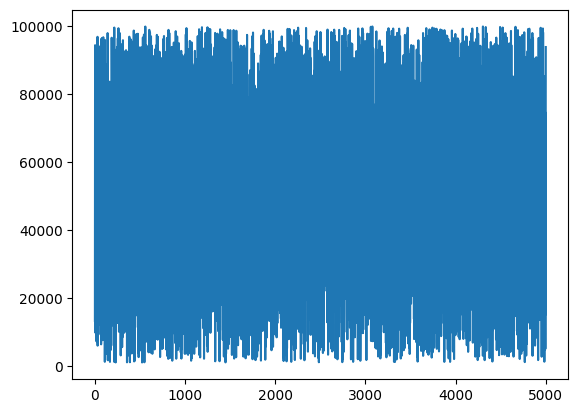

In [147]:
car_sales["Odometer (KM)"].plot(); # tip: the ";" on the end prevents matplotlib from outputing the plot class

Or compare two columns by passing them as `x` and `y` to `plot()`.

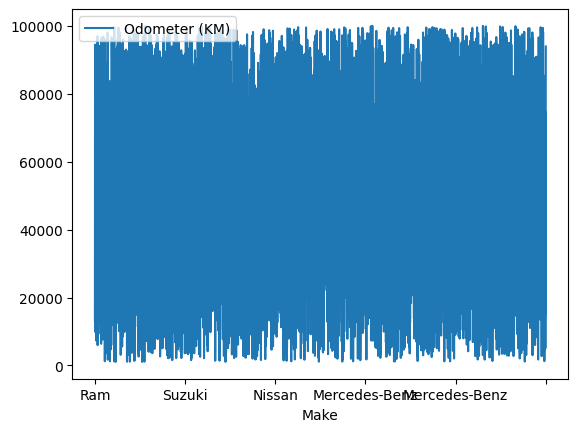

In [148]:
car_sales.plot(x="Make", y="Odometer (KM)"); 

You can see the distribution of a column by calling `.hist()` on you.

The distribution of something is a way of describing the spread of different values.

<Axes: >

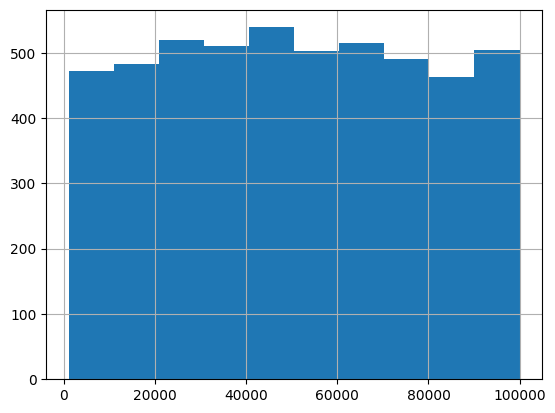

In [149]:
car_sales["Odometer (KM)"].hist()

In this case, the majority of the **distribution** (spread) of the `"Odometer (KM)"` column is more towards the left of the graph. And there are two values which are more to the right. These two values to the right could be considered **outliers** (not part of the majority).

Now what if we wanted to plot our `"Price"` column?

Let's try.

In [150]:
car_sales["Price"].plot()

TypeError: no numeric data to plot

Trying to run it leaves us with an error. This is because the `"Price"` column of `car_sales` isn't in numeric form. We can tell this because of the `TypeError: no numeric data to plot` at the bottom of the cell.

We can check this with `.info()`.

In [158]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           5000 non-null   object
 1   Colour         5000 non-null   object
 2   Odometer (KM)  5000 non-null   int64 
 3   Doors          5000 non-null   int64 
 4   Price          5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


So what can we do?

We need to convert the `"Price"` column to a numeric type.

How?

We could try a few different things on our own. But let's practice researching.



**1.** Open up a search engine and type in something like "how to convert a pandas column price to integer".

In the first result, I found this [Stack Overflow question and answer](https://stackoverflow.com/questions/44469313/price-column-object-to-int-in-pandas) . Where someone has had the same problem as us and someone else has provided an answer.

> **Note:** Sometimes the answer you're looking for won't be in the first result, or the 2nd or the 3rd. You may have to combine a few different solutions. Or, if possible, you can try and ask ChatGPT to help you out.

**2.** In practice, you'd read through this and see if it relates to your problem. 

**3.** If it does, you can adjust the code from what's given in the Stack Overflow answer(s) to your own problem.

**4.** If you're still stuck, you can try and converse with ChatGPT to help you with your problem (as long as the data/problem you're working on is okay to share - never share private data with anyone on the internet, including AI chatbots).

<img src="../images/pandas-steps-in-stack-overflow-process.png" alt="steps in researching a problem you have using Google and Stack Overflow" width="1000"/>

What's important in the beginning is not to remember every single detail off by heart but to know where to look. Remember, if in doubt, write code, run it, see what happens.

Let's copy the answer code here and see how it relates to our problem.

Answer code: ```dataframe['amount'] = dataframe['amount'].str.replace('[\$\,\.]', '').astype(int)```

There's a lot going on here but what we can do is change the parts which aren't in our problem and keep the rest the same.

Our `DataFrame` is called `car_sales` not `dataframe`.

```car_sales['amount'] = car_sales['amount'].str.replace('[\$\,\.]', '').astype(int)```

And our `'amount'` column is called `"Price"`.

```car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)```

That looks better. What the code on the right of `car_sales["Price"]` is saying is "remove the $ sign and comma and change the type of the cell to int".

Let's see what happens.

In [59]:
# Change Price column to integers
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,40681
1,Chevrolet,navy,47817,7,27367
2,INFINITI,gray,94484,5,15164
3,Chevrolet,yellow,82774,7,31538
4,Nissan,olive,9845,3,90121
...,...,...,...,...,...
4995,GMC,gray,66301,4,96958
4996,Chrysler,fuchsia,15145,5,77949
4997,Cadillac,teal,54776,6,15387
4998,Lexus,aqua,72956,4,88575


Cool! but there are extra zeros in the `Price` column.

Let's remove it.

In [60]:
# Remove extra zeros from the price column
car_sales["Price"] = car_sales["Price"].str[:-2].astype(int)

In [61]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

Beautiful! Now let's try to plot it agian.

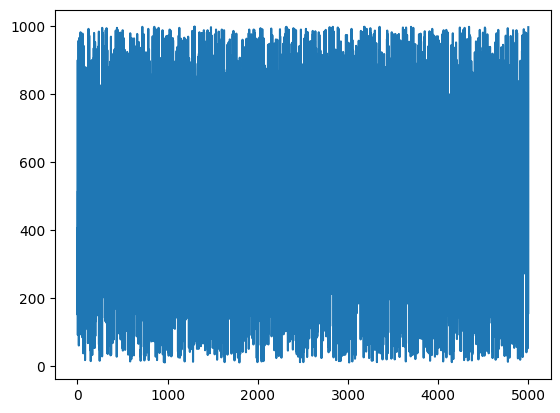

In [62]:
car_sales["Price"].plot();

This is one of the many ways you can manipulate data using pandas. 

When you see a number of different functions in a row, it's referred to as **chaining**. This means you add together a series of functions all to do one overall task.

Let's see a few more ways of manipulating data.

## 6. Manipulating data

You've seen an example of one way to manipulate data but pandas has many more. 

How many more? 

Put it this way, if you can imagine it, chances are, pandas can do it.

Let's start with string methods. Because pandas is based on Python, however you can manipulate strings in Python, you can do the same in pandas.

You can access the string value of a column using `.str`. Knowing this, how do you think you'd set a column to lowercase?

In [63]:
# Lower the Make column
car_sales["Make"].str.lower()

0             ram
1       chevrolet
2        infiniti
3       chevrolet
4          nissan
          ...    
4995          gmc
4996     chrysler
4997     cadillac
4998        lexus
4999        lotus
Name: Make, Length: 5000, dtype: object

Notice how it doesn't change the values of the original `car_sales` `DataFrame` unless we set it equal to.

In [64]:
# View top 5 rows, Make column not lowered
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Ram,fuchsia,13295,2,406
1,Chevrolet,navy,47817,7,273
2,INFINITI,gray,94484,5,151
3,Chevrolet,yellow,82774,7,315
4,Nissan,olive,9845,3,901


In [65]:
# Set Make column to be lowered
car_sales["Make"] = car_sales["Make"].str.lower()
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,ram,fuchsia,13295,2,406
1,chevrolet,navy,47817,7,273
2,infiniti,gray,94484,5,151
3,chevrolet,yellow,82774,7,315
4,nissan,olive,9845,3,901


Reassigning the column changes it in the original `DataFrame`. This trend occurs throughout all kinds of data manipulation with pandas.

Some functions have a parameter called `inplace` which means a `DataFrame` is updated in place without having to reassign it.

Let's see what it looks like in combination with `.fillna()`, a function which fills missing data. But the thing is, our table isn't missing any data.

In practice, it's likely you'll work with datasets which aren't complete. What this means is you'll have to decide whether how to fill the missing data or remove the rows which have data missing.

Let's check out what a version of our `car_sales` `DataFrame` might look like with missing values.

In [66]:
# Import car sales data with missing values
car_sales_missing = pd.read_csv("../data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


Missing values are shown by `NaN` in pandas. This can be considered the equivalent of `None` in Python.

Let's use the [`.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) function to fill the `Odometer` column with the average of the other values in the same column.

We'll do it with and without `inplace`.

In [67]:
# Fill Odometer column missing values with mean
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace=False) # inplace is set to False by default 

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

Now let's check the original `car_sales_missing` `DataFrame`.

In [68]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


Because `inplace` is set to `False` (default), there's still missing values in the `"Odometer"` column. Let's try setting `inplace` to `True`.

In [69]:
# Fill the Odometer missing values to the mean with inplace=True
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),
                                     inplace=True)

Now let's check the `car_sales_missing` `DataFrame` again.

In [70]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


The missing values in the `Odometer` column have been filled with the mean value of the same column.

In practice, you might not want to fill a column's missing values with the mean, but this example was to show the difference between `inplace=False` (default) and `inplace=True`.

Whichever you choose to use will depend on how you structure your code. 

All you have to remember is `inplace=False` returns a copy of the `DataFrame` you're working with.

This is helpful if you want to make a duplicate of your current `DataFrame` and save it to another variable.

Where as, `inplace=True` makes all the changes directly to the target `DataFrame`. 

We've filled some values but there's still missing values in `car_sales_missing`. Let's say you wanted to remove any rows which had missing data and only work with rows which had complete coverage.

You can do this using [`.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [71]:
# Remove missing data
car_sales_missing.dropna()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


It appears the rows with missing values have been removed, now let's check to make sure.

In [72]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


Hmm, they're still there, can you guess why?

It's because `.dropna()` has `inplace=False` as default. We can either set `inplace=True` or reassign the `car_sales_missing` `DataFrame`.

In [73]:
# The following two lines do the same thing
car_sales_missing.dropna(inplace=True) # Operation happens inplace without reassignment
car_sales_missing = car_sales_missing.dropna() # car_sales_missing gets reassigned to same DataFrame but with dropped values  

Now if check again, the rows with missing values are gone and the index numbers have been updated.

In [74]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


Instead of removing or filling data, what if you wanted to create it?

For example, creating a column called `Seats` for number of seats.

pandas allows for simple extra column creation on `DataFrame`'s. 

Three common ways are: 
1. Adding a `pandas.Series` as a column.
2. Adding a Python list as a column.
3. By using existing columns to create a new column.

In [75]:
# Create a column from a pandas Series
seats_column = pd.Series([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,ram,fuchsia,13295,2,406,5.0
1,chevrolet,navy,47817,7,273,5.0
2,infiniti,gray,94484,5,151,5.0
3,chevrolet,yellow,82774,7,315,5.0
4,nissan,olive,9845,3,901,5.0
...,...,...,...,...,...,...
4995,gmc,gray,66301,4,969,NaN
4996,chrysler,fuchsia,15145,5,779,NaN
4997,cadillac,teal,54776,6,153,NaN
4998,lexus,aqua,72956,4,885,NaN


Creating a column is similar to selecting a column, you pass the target `DataFrame` along with a new column name in brackets.

In [76]:
# Create a column from a Python list
engine_sizes = [1.3, 2.0, 3.0, 4.2, 1.6, 1, 2.0, 2.3, 2.0, 3.0]
car_sales["Engine Size"] = engine_sizes
car_sales

ValueError: Length of values (10) does not match length of index (5000)

You can also make a column by directly combining the values of other columns. Such as, price per kilometre on the Odometer.

In [ ]:
# Column from other columns
car_sales["Price per KM"] = car_sales["Price"] / car_sales["Odometer (KM)"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Price per KM
0,ram,fuchsia,13295,2,406,5.0,0.030538
1,chevrolet,navy,47817,7,273,5.0,0.005709
2,infiniti,gray,94484,5,151,5.0,0.001598
3,chevrolet,yellow,82774,7,315,5.0,0.003806
4,nissan,olive,9845,3,901,5.0,0.091519
...,...,...,...,...,...,...,...
4995,gmc,gray,66301,4,969,NaN,0.014615
4996,chrysler,fuchsia,15145,5,779,NaN,0.051436
4997,cadillac,teal,54776,6,153,NaN,0.002793
4998,lexus,aqua,72956,4,885,NaN,0.012131


Now can you think why this might not be a great column to add?

It could be confusing when a car with less kilometers on the odometer looks to cost more per kilometre than one with more. 

When buying a car, usually less kilometres on the odometer is better.

This kind of column creation is called [**feature engineering**](https://en.wikipedia.org/wiki/Feature_engineering), the practice of enriching your dataset with more information (either from it directly or elsewhere).

If `Make`, `Colour`, `Doors` are features of the data, creating `Price per KM` could be another. But in this case, not a very good one.

As for column creation, you can also create a new column setting all values to a one standard value.

In [ ]:
# Column to all 1 value (number of wheels)
car_sales["Number of wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Price per KM,Number of wheels
0,ram,fuchsia,13295,2,406,5.0,0.030538,4
1,chevrolet,navy,47817,7,273,5.0,0.005709,4
2,infiniti,gray,94484,5,151,5.0,0.001598,4
3,chevrolet,yellow,82774,7,315,5.0,0.003806,4
4,nissan,olive,9845,3,901,5.0,0.091519,4
...,...,...,...,...,...,...,...,...
4995,gmc,gray,66301,4,969,NaN,0.014615,4
4996,chrysler,fuchsia,15145,5,779,NaN,0.051436,4
4997,cadillac,teal,54776,6,153,NaN,0.002793,4
4998,lexus,aqua,72956,4,885,NaN,0.012131,4


In [ ]:
car_sales["Passed road safety"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Price per KM,Number of wheels,Passed road safety
0,ram,fuchsia,13295,2,406,5.0,0.030538,4,True
1,chevrolet,navy,47817,7,273,5.0,0.005709,4,True
2,infiniti,gray,94484,5,151,5.0,0.001598,4,True
3,chevrolet,yellow,82774,7,315,5.0,0.003806,4,True
4,nissan,olive,9845,3,901,5.0,0.091519,4,True
...,...,...,...,...,...,...,...,...,...
4995,gmc,gray,66301,4,969,NaN,0.014615,4,True
4996,chrysler,fuchsia,15145,5,779,NaN,0.051436,4,True
4997,cadillac,teal,54776,6,153,NaN,0.002793,4,True
4998,lexus,aqua,72956,4,885,NaN,0.012131,4,True


Now you've created some columns, you decide to show your colleague what you've done. When they ask about the `Price per KM` column, you tell them you're not really sure why it's there.

You decide you better remove it to prevent confusion.

You can remove a column using [`.drop('COLUMN_NAME', axis=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [ ]:
# Drop the Price per KM column
car_sales = car_sales.drop("Price per KM", axis=1) # columns live on axis 1
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Number of wheels,Passed road safety
0,ram,fuchsia,13295,2,406,5.0,4,True
1,chevrolet,navy,47817,7,273,5.0,4,True
2,infiniti,gray,94484,5,151,5.0,4,True
3,chevrolet,yellow,82774,7,315,5.0,4,True
4,nissan,olive,9845,3,901,5.0,4,True
...,...,...,...,...,...,...,...,...
4995,gmc,gray,66301,4,969,NaN,4,True
4996,chrysler,fuchsia,15145,5,779,NaN,4,True
4997,cadillac,teal,54776,6,153,NaN,4,True
4998,lexus,aqua,72956,4,885,NaN,4,True


Why `axis=1`? Because that's the axis columns live on. Rows live on `axis=0`.

Let's say you wanted to shuffle the order of your `DataFrame` so you could split it into train, validation and test sets. And even though the order of your samples was random, you wanted to make sure.

To do so you could use [`.sample(frac=1)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html). 

`.sample()` randomly samples different rows from a `DataFrame`. 

The `frac` parameter dictates the fraction, where 1 = 100% of rows, 0.5 = 50% of rows, 0.01 = 1% of rows.

You can also use `.sample(n=1)` where `n` is the number of rows to sample.

In [ ]:
# Sample car_sales
car_sales_sampled = car_sales.sample(frac=1)
car_sales_sampled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Number of wheels,Passed road safety
2200,gmc,aqua,11569,4,802,NaN,4,True
1917,ford,black,69857,5,612,NaN,4,True
615,toyota,white,93759,2,487,NaN,4,True
4635,nissan,black,58579,4,954,NaN,4,True
1897,volkswagen,navy,75515,6,377,NaN,4,True
...,...,...,...,...,...,...,...,...
4745,chevrolet,gray,16157,6,897,NaN,4,True
1930,bmw,blue,14117,5,401,NaN,4,True
1780,ford,blue,1734,5,24,NaN,4,True
994,nissan,black,10032,2,337,NaN,4,True


Notice how the rows remain intact but their order is mixed (check the indexes).

`.sample(frac=X)` is also helpful when you're working with a large `DataFrame`. 

Say you had 2,000,000 rows.

Running tests, analysis and machine learning algorithms on 2,000,000 rows could take a long time. And since being a data scientist or machine learning engineer is about reducing the time between experiments, you might begin with a sample of rows first.

For example, you could use `40k_rows = 2_mil_rows.sample(frac=0.05)` to work on 40,000 rows from a `DataFrame` called `2_mil_rows` containing 2,000,000 rows.

What if you wanted to get the indexes back in order?

You could do so using [`.reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).

In [ ]:
# Reset the indexes of car_sales_sampled
car_sales_sampled.reset_index()

,index,Make,Colour,Odometer (KM),Doors,Price,Seats,Number of wheels,Passed road safety
0,2200,gmc,aqua,11569,4,802,NaN,4,True
1,1917,ford,black,69857,5,612,NaN,4,True
2,615,toyota,white,93759,2,487,NaN,4,True
3,4635,nissan,black,58579,4,954,NaN,4,True
4,1897,volkswagen,navy,75515,6,377,NaN,4,True
...,...,...,...,...,...,...,...,...,...
4995,4745,chevrolet,gray,16157,6,897,NaN,4,True
4996,1930,bmw,blue,14117,5,401,NaN,4,True
4997,1780,ford,blue,1734,5,24,NaN,4,True
4998,994,nissan,black,10032,2,337,NaN,4,True


Calling `.reset_index()` on a `DataFrame` resets the index numbers to their defaults. It also creates a new `Index` column by default which contains the previous index values.

Finally, what if you wanted to apply a function to a column. Such as, converting the `Odometer` column from kilometers to miles.

You can do so using the [`.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) function and passing it a Python [lambda function](https://www.w3schools.com/python/python_lambda.asp). We know there's about 1.6 kilometers in a mile, so if you divide the value in the `Odometer` column by 1.6, it should convert it to miles.

In [ ]:
# Change the Odometer values from kilometres to miles
car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)

0        8309.375
1       29885.625
2       59052.500
3       51733.750
4        6153.125
          ...    
4995    41438.125
4996     9465.625
4997    34235.000
4998    45597.500
4999    58715.000
Name: Odometer (KM), Length: 5000, dtype: float64

Now let's check our `car_sales` `DataFrame`.

In [ ]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Number of wheels,Passed road safety
0,ram,fuchsia,13295,2,406,5.0,4,True
1,chevrolet,navy,47817,7,273,5.0,4,True
2,infiniti,gray,94484,5,151,5.0,4,True
3,chevrolet,yellow,82774,7,315,5.0,4,True
4,nissan,olive,9845,3,901,5.0,4,True
...,...,...,...,...,...,...,...,...
4995,gmc,gray,66301,4,969,NaN,4,True
4996,chrysler,fuchsia,15145,5,779,NaN,4,True
4997,cadillac,teal,54776,6,153,NaN,4,True
4998,lexus,aqua,72956,4,885,NaN,4,True


The `Odometer` column didn't change. Can you guess why?

We didn't reassign it.

In [ ]:
# Reassign the Odometer column to be miles instead of kilometers
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Number of wheels,Passed road safety
0,ram,fuchsia,8309.375,2,406,5.0,4,True
1,chevrolet,navy,29885.625,7,273,5.0,4,True
2,infiniti,gray,59052.500,5,151,5.0,4,True
3,chevrolet,yellow,51733.750,7,315,5.0,4,True
4,nissan,olive,6153.125,3,901,5.0,4,True
...,...,...,...,...,...,...,...,...
4995,gmc,gray,41438.125,4,969,NaN,4,True
4996,chrysler,fuchsia,9465.625,5,779,NaN,4,True
4997,cadillac,teal,34235.000,6,153,NaN,4,True
4998,lexus,aqua,45597.500,4,885,NaN,4,True


If you've never seen a lambda function they can be tricky. What the line above is saying is "take the value in the `Odometer (KM)` column (`x`) and set it to be itself divided by 1.6".

## Summary

### Main topics we covered
* [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) - a single column (can be multiple rows) of values.
* [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) - multiple columns/rows of values (a DataFrame is comprised of multiple Series).
* [Importing data](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) - we used [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas-read-csv) to read in a CSV (comma-separated values) file but there are multiple options for reading data.
* [Exporting data](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) - we exported our data using `to_csv()`, however there are multiple methods of exporting data.
* [Describing data](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
    * `df.dtypes` - find the datatypes present in a dataframe.
    * `df.describe()` - find various numerical features of a dataframe.
    * `df.info()` - find the number of rows and whether or not any of them are empty.
* [Viewing and selecting data](https://pandas.pydata.org/docs/user_guide/10min.html#viewing-data)
    * `df.head()` - view the first 5 rows of `df`.
    * `df.loc` & `df.iloc` - select specific parts of a dataframe.
    * `df['A']` - select column `A` of `df`.
    * `df[df['A'] > 1000]` - selection column `A` rows with values over 1000 of `df`.
    * `df['A']` - plot values from column `A` using matplotlib (defaults to line graph).
* [Manipulating data and performing operations](https://pandas.pydata.org/docs/user_guide/10min.html#operations) - pandas has many built-in functions you can use to manipulate data, also many of the Python operators (e.g. `+`, `-`, `>`, `==`) work with pandas.
 
### Further reading
Since pandas is such a large library, it would be impossible to cover it all in one go. 

The following are some resources you might want to look into for more.
* [Python for Data Analysis by Wes McKinney](https://wesmckinney.com/book/) - possibly the most complete text of the pandas library (apart from the documentation itself) written by the creator of pandas.
* [Data Manipulation with Pandas (section of Python Data Science Handbook by Jake VanderPlas)](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) - a very hands-on approach to many of the main functions in the pandas library.  

### Exercises
After completing this notebook, you next thing should be to try out some more pandas code of your own.

I'd suggest at least going through number 1 (write out all the code yourself), a couple from number 2 (again, write out the code yourself) and spend an hour reading number 3 (this is vast but keep it in mind).

1. [10-minute introduction to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) - go through all the functions here and be sure to write out the code yourself.
2. [Pandas getting started tutorial](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html) - pick a couple from here which spark your interest and go through them both writing out the code for your self.
3. [Pandas essential basic functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) - spend an hour reading this and bookmark it for whenever you need to come back for an overview of pandas.